# Underwater analysis of feature detectors

Some methods needed for analysis:

In [2]:
def read_segmentation_results(paths):
    all_feature_counts = []
    all_percentages = []
    all_time_counts = []

    for i in range(number_of_tests):
        feature_counts = []
        percentages = []
        time_counts = []
    
        with open(paths[i], mode ='r')as file:
            csvFile = csv.reader(file)
            line_number = 0
            for lines in csvFile:
                # Skip first line
                if line_number != 0:
                    feature_counts.append(float(lines[2]))
                    percentages.append(float(lines[4]))
                    time_counts.append(float(lines[5]))
                line_number = line_number+1
        all_feature_counts.append(feature_counts)
        all_percentages.append(percentages)
        all_time_counts.append(time_counts)
    return all_feature_counts, all_percentages, all_time_counts

def clean_data(data):
    cleaned_data = []
    for i in range(len(data)):
        if data[i] >= 0:
            cleaned_data.append(data[i])
    return cleaned_data

def read_match_results(paths):
    all_match_counts = []
    all_match_percentages = []
    for i in range(number_of_tests):
        match_counts = []
        match_percentages = []
        with open(paths[i], mode ='r')as file:
            csvFile = csv.reader(file)
            line_number = 0
            for lines in csvFile:
                # Skip first line
                if line_number != 0:
                    match_counts.append(float(lines[2]))
                    # Only read positive percentages
                    if float(lines[3]) >= 0:
                        match_percentages.append(float(lines[3]))
                line_number = line_number+1
        all_match_counts.append(match_counts)
        all_match_percentages.append(match_percentages)
    return all_match_counts, all_match_percentages

## Sift test:

The first feature detector tested is sift. All the parameters are tested in terms of number of features found, number of features that match the segmented image as well as the time it takes to find the features. During testing only the 1000 best features where kept, due to the fact that too many features would make everything slower as well as make it harder to detect any specific shape amongst them.

### Contrast threshold:

The variable that had the most imediate influence on the number of features detected was experienced to be the contrast threshold.
It was therefore the first variable that was tested. The remaining variable where kept constant at their advised/default values. Those being:<br>
Layers: 3<br>
Edge threshold: 10<br>
Sigma: 1.6<br>
With precise upscaling disabled.<br>

The recorded data can be categorized into three categories. Those being clear video feeds of only pillars, pillars located within tanks and pillars located in crowded environments. The different parameters are tested on each of these categories.<br>

Three videos where categorized as containing only a pillar in an empty underwater environment. From these a total of 150 frames, where taken and segmented for these tests. The frames where taken at an equal interval ensuring that frames from every part of the videos where used.<br>

Four videos where categorized as crowded environments, resulting in 200 frames being analysed. <br>

Three videos where categorized as being in a tank, resulting in 150 frames being analysed. <br>

The test therefore includes a total of 500 frames. <br>

Data is read:

In [5]:
import csv

# Paths
paths_clear = []
paths_match_clear = []
paths_crowded = []
paths_match_crowded = []
paths_tank = []
paths_match_tank = []

# Other variables
number_of_tests = 11
contrast_thresholds = [0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.008]

# Get all file paths
for i in range(number_of_tests):
    path_clear = '../Data/Sift/Clear_Dataset/contrast_test_'+ str(i) +'_results.csv'
    path_match_clear = '../Data/Sift/Clear_Dataset/'+str(i)+'_contrast_match_results.csv'
    path_crowded = '../Data/Sift/Crowded_Dataset/contrast_test_'+ str(i) +'_results.csv'
    path_match_crowded = '../Data/Sift/Crowded_Dataset/'+str(i)+'_contrast_match_results.csv'
    path_tank = '../Data/Sift/Tank_Dataset/contrast_test_'+ str(i) +'_results.csv'
    path_match_tank = '../Data/Sift/Tank_Dataset/'+str(i)+'_contrast_match_results.csv'
    paths_clear.append(path_clear)
    paths_match_clear.append(path_match_clear)
    paths_crowded.append(path_crowded)
    paths_match_crowded.append(path_match_crowded)
    paths_tank.append(path_tank)
    paths_match_tank.append(path_match_tank)

# Extract desired information
all_feature_counts_clear, all_percentages_clear, all_time_counts_clear = read_segmentation_results(paths_clear)
all_feature_counts_crowded, all_percentages_crowded, all_time_counts_crowded = read_segmentation_results(paths_crowded)
all_feature_counts_tank, all_percentages_tank, all_time_counts_tank = read_segmentation_results(paths_tank)

all_match_counts_clear,all_match_percentages_clear = read_match_results(paths_match_clear)
all_match_counts_crowded,all_match_percentages_crowded = read_match_results(paths_match_crowded)
all_match_counts_tank,all_match_percentages_tank = read_match_results(paths_match_tank)

The first data of interest is the number of samples usable for each test. This is due to one of the test criteria being a percentage, which means samples with zero features present no valid percentage for analysis. Total samples, valid samples, contrast threshold and environment are therefore showcased in below table:

In [3]:
from tabulate import tabulate, SEPARATING_LINE

# remove -1 elements as it is the representation of N/A and count valid samples
valid_samples_percentages_clear = []
valid_samples_percentages_crowded = []
valid_samples_percentages_tank = []
all_percentages_clear_clean = []
all_percentages_crowded_clean = []
all_percentages_tank_clean = []

for i in range(len(all_percentages_clear)):
    clean_temp = clean_data(all_percentages_clear[i])
    all_percentages_clear_clean.append(clean_temp)
    valid_samples_percentages_clear.append(len(all_percentages_clear_clean[i]))
    
for i in range(len(all_percentages_crowded)):
    clean_temp = clean_data(all_percentages_crowded[i])
    all_percentages_crowded_clean.append(clean_temp)
    valid_samples_percentages_crowded.append(len(all_percentages_crowded_clean[i]))

for i in range(len(all_percentages_tank)):
    clean_temp = clean_data(all_percentages_tank[i])
    all_percentages_tank_clean.append(clean_temp)
    valid_samples_percentages_tank.append(len(all_percentages_tank_clean[i]))

# Create headers
headers = ["contrast threshold","valid samples", "total samples", "percentage valid"]

# Prepare table data
table_data = [[],[],[]]
enviroments = ["Clear", "Crowded", "Tank"]
valid_environments = [valid_samples_percentages_clear, valid_samples_percentages_crowded, valid_samples_percentages_tank]
complete_environments = [all_percentages_clear,all_percentages_crowded,all_percentages_tank]
for i in range(len(enviroments)):
    row = []
    for j in range(len(contrast_thresholds)):
        row = [contrast_thresholds[j],valid_environments[i][j],len(complete_environments[i][j]),(valid_environments[i][j]/len(complete_environments[i][j]))*100.0]
        table_data[i].append(row)

#display table
for i in range(len(enviroments)):
    print(enviroments[i]+":")
    print(tabulate(table_data[i], headers=headers,tablefmt="heavy_grid", numalign="right", floatfmt=".3f"))

Clear:
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃   contrast threshold ┃   valid samples ┃   total samples ┃   percentage valid ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                0.090 ┃              46 ┃             150 ┃             30.667 ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                0.080 ┃              61 ┃             150 ┃             40.667 ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                0.070 ┃              73 ┃             150 ┃             48.667 ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                0.060 ┃              94 ┃             150 ┃             62.667 ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                0.050 ┃             111 ┃             150 ┃             74.000 ┃
┣━━━━━━━━

From these tables it can be seen that the clear dataset experience a big decrease in valid data samples, the higher the contrast threshold goes. This is due to many cases, where zero features are found. Since division by zero is illegal, the percentage results are invalid for these samples. This shows a very clear problem with using high value contrast thresholds in clear environments, but also means that the sample sizes will be skewed, when it comes to percentage measurements in the up comming analysis. The clear tests are also at some contrast threhsholds close to having a not statistical significant sample size (around 30 samples).<br>

The median, 25% and 75% percentile are now analysed for the three evaluation categories, that being features found, time taken, and percentage of features within segmented area. 

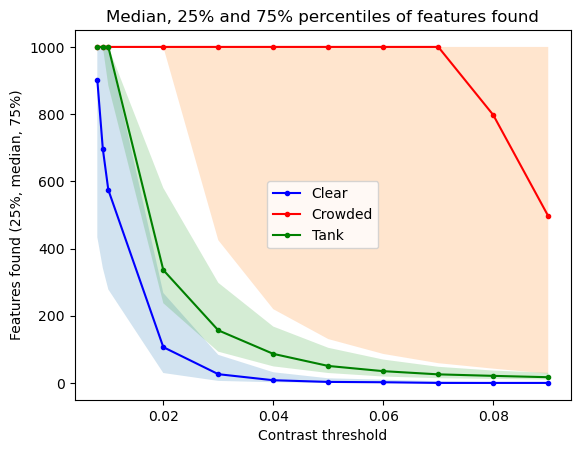

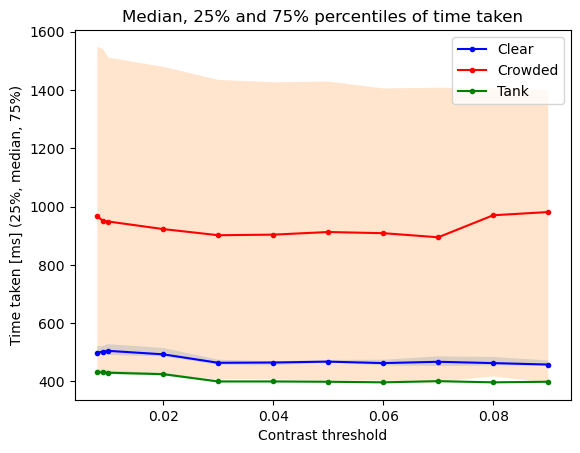

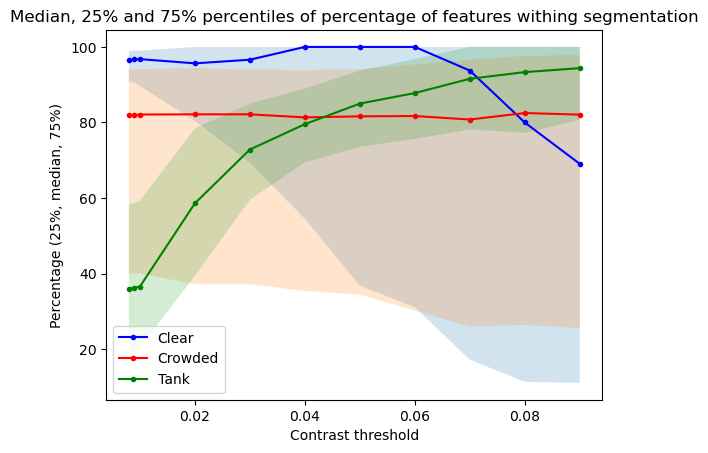

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 

# Find medians and quantiles
medians = []
percentiles_25 = []
percentiles_75 = []

feature_environments = [all_feature_counts_clear,all_feature_counts_crowded,all_feature_counts_tank]
time_environments = [all_time_counts_clear,all_time_counts_crowded,all_time_counts_tank]
percentage_environments = [all_percentages_clear_clean,all_percentages_crowded_clean,all_percentages_tank_clean]

for i in range(len(enviroments)):
    feature_medians = []
    feature_percentiles_25 = []
    feature_percentiles_75 = []
    time_medians = []
    time_percentiles_25 = []
    time_percentiles_75 = []
    percentage_medians = []
    percentage_percentiles_25 = []
    percentage_percentiles_75 = []
    
    for j in range(number_of_tests):     
        feature_medians.append(statistics.median(feature_environments[i][j]))
        feature_percentiles_25.append(np.percentile(feature_environments[i][j], 25))
        feature_percentiles_75.append(np.percentile(feature_environments[i][j], 75))
        
        time_medians.append(statistics.median(time_environments[i][j]))
        time_percentiles_25.append(np.percentile(time_environments[i][j], 25))
        time_percentiles_75.append(np.percentile(time_environments[i][j], 75))
        
        percentage_medians.append(statistics.median(percentage_environments[i][j]))
        percentage_percentiles_25.append(np.percentile(percentage_environments[i][j], 25))
        percentage_percentiles_75.append(np.percentile(percentage_environments[i][j], 75))

    medians.append([feature_medians,time_medians,percentage_medians])
    percentiles_25.append([feature_percentiles_25,time_percentiles_25,percentage_percentiles_25])
    percentiles_75.append([feature_percentiles_75,time_percentiles_75,percentage_percentiles_75])

# Data structure: environment -> test category -> contrast threshold setting

# Number of features is plotted
plt.plot(contrast_thresholds,medians[0][0],marker='.',color='b',label="Clear")
plt.fill_between(contrast_thresholds, percentiles_25[0][0],percentiles_75[0][0], alpha=0.2)

plt.plot(contrast_thresholds,medians[1][0],marker='.',color='r',label="Crowded")
plt.fill_between(contrast_thresholds, percentiles_25[1][0],percentiles_75[1][0], alpha=0.2)

plt.plot(contrast_thresholds,medians[2][0],marker='.',color='g',label="Tank")
plt.fill_between(contrast_thresholds, percentiles_25[2][0],percentiles_75[2][0], alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Features found (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of features found')
plt.legend()
plt.savefig("contrast_feature_graph.jpg")
plt.show()


# Time taken is plotted
plt.plot(contrast_thresholds,medians[0][1],marker='.',color='b',label="Clear")
plt.fill_between(contrast_thresholds, percentiles_25[0][1],percentiles_75[0][1], alpha=0.2)

plt.plot(contrast_thresholds,medians[1][1],marker='.',color='r',label="Crowded")
plt.fill_between(contrast_thresholds, percentiles_25[1][1],percentiles_75[1][1], alpha=0.2)

plt.plot(contrast_thresholds,medians[2][1],marker='.',color='g',label="Tank")
plt.fill_between(contrast_thresholds, percentiles_25[2][1],percentiles_75[2][1], alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Time taken [ms] (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of time taken')
plt.legend()
plt.savefig("contrast_time_graph.jpg")
plt.show()

# Percentage is plotted
plt.plot(contrast_thresholds,medians[0][2],marker='.',color='b',label="Clear")
plt.fill_between(contrast_thresholds, percentiles_25[0][2],percentiles_75[0][2], alpha=0.2)

plt.plot(contrast_thresholds,medians[1][2],marker='.',color='r',label="Crowded")
plt.fill_between(contrast_thresholds, percentiles_25[1][2],percentiles_75[1][2], alpha=0.2)

plt.plot(contrast_thresholds,medians[2][2],marker='.',color='g',label="Tank")
plt.fill_between(contrast_thresholds, percentiles_25[2][2],percentiles_75[2][2], alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Percentage (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of percentage of features withing segmentation')
plt.legend()
plt.savefig("contrast_percentage_graph.jpg")
plt.show()

# Find layer with best median value
final_sum = 0
final_layer = 0
for j in range(number_of_tests):
    median_sum = medians[0][2][j]+medians[1][2][j]+medians[2][2][j]
    if median_sum > final_sum:
        final_sum = median_sum
        final_layer = layers[j]
print("The best median performance is at layer: " + str(final_layer) + " with a percentage sum of " + str(final_sum))

The results show that the feature detector performs very differently depending on area type. Crowded areas produce the most amount of features at the cost of some accuracy in terms of percentage of features within the desired areas (pillars and protruding edges). It is also crowded areas that produce the most spread in terms of all test categories, most likely due to how different the crowded environments are to eachother compared to the more identical clear and tank environments. It is also the environment that seems the most stable in terms of features being located within the segmented areas, most likely due to the more spread distribution of features, due to various textures. It would therefore be beneficial to have high contrast thresholds in crowded environments since the removed features  dont seem to affect the median match percentage in a negative way.<br>

The tank environment sees the least amount of spread, most likely due to all the test environments being located within the same type of tank. It furthermore performs better in terms of feature count compared to the clear datasets. Reasons for this could be impurities in the concrete walls, the different color of the pipes (blue) or the increased clarity of the water. Looking at the segmentation results, it can be seen that the performance is increased with the increase in contrast threshold (and thus smaller amount of features). This indicate that only a couple of features are located on the pipes, but that these features are very clear. When decreasing the threshold more features will be found, but these will lie in the impurities of the background instead of on the desired pipes. The tank environment also seem to perform the fastest, even though more features are found. This might be due to the simplicity of the more static environment, or some difference in image sizes, which will be explored later. High contrast thresholds are therefore desired in tank environments, while still ensuring that a good amount of features are found. <br>

The clear environment clearly performs the worst in terms of feature counts, with many contrast threshold being unusable due to the tiny or no amount of features found. The results also indicate that the few features found at high contrast thresholds are likely to lie outside the desired areas. Only few features are however of high quality in the background, and thus increasing the amount of features found will increase the percentage of features being located as desired. This is in stark contrast to the tank environment. Low contrast thresholds are desired for clear environments, since it mostly just adds features in the desired areas.<br>

If only tank environment exists, a contrast threshold of 0.04 - 0.06 would probably be best, since it results in high segmentation match percentage, while still containing some features to work with.<br>

If only clear environments exists, a contrast threshold of 0.02-0.03 would be best, since high segmentation matching is present, while the feature count is not completly in the gutter. <br>

For this reasing it would be best to use either 0.03 or 0.04 in order to have high performance in all environments, while keeping the feature count existent for all environments. One would just have to keep fewer features in the complex environments. <br>

For future testing a contrast threshold of 0.02 is used, since this allows for more features being present, thus making it easier to see the affect of other changes. But the final implementation will be using a contrast threshold of 0.03. <br>

Some histograms will now be explored to analyse the high spread of crowded dataset, as well as the percentage spread for the clear dataset.

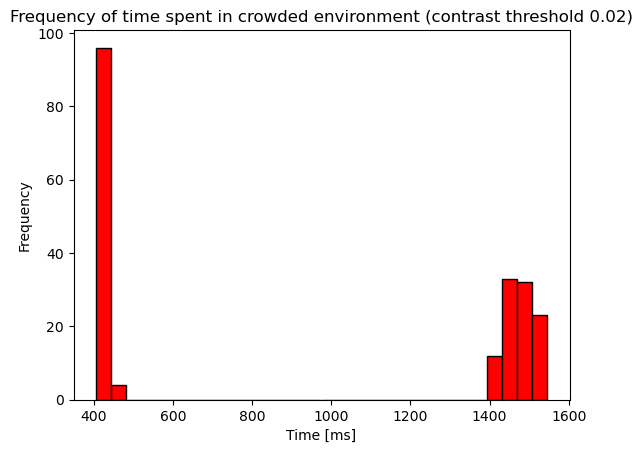

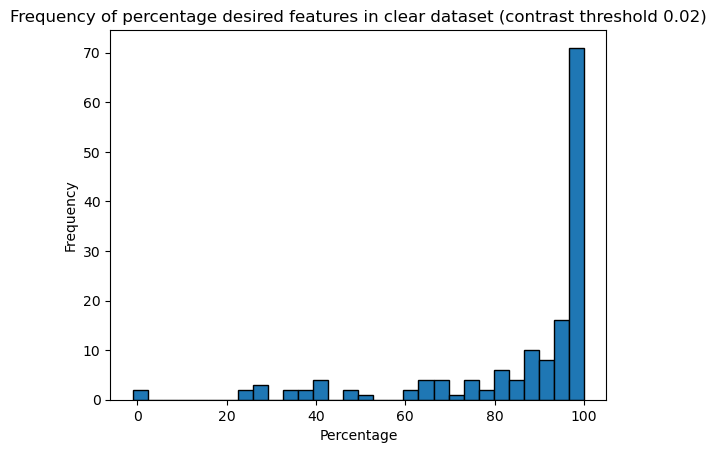

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Feature histotgram for crowded time
n_bins = 30
plt.hist(all_time_counts_crowded[7] ,bins=n_bins,color='r', density=False,edgecolor='black')
plt.xlabel('Time [ms]')
plt.ylabel('Frequency')
plt.title('Frequency of time spent in crowded environment (contrast threshold 0.02)')
plt.savefig("contrast_time_histogram.jpg")
plt.show()

# Feature histotgram for clear percentage
n_bins = 30
plt.hist(all_percentages_clear[7] ,bins=n_bins, density=False,edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Frequency of percentage desired features in clear dataset (contrast threshold 0.02)')
plt.savefig("contrast_percentage_histogram.jpg")
plt.show()



A clear difference is seen between the spread of the clear dataset, compared to that seen in the crowded dataset. There is a very clear cut between the low and high times in the crowded dataset, which indicates that something is different in the datasets. The difference was identified to be a difference in frame size between the crowded datasets. Two of which has a frame size of 2448 × 2058 (.mp4) and the other two having a frame size of 1920 × 1080 (.mkv). The clear data spread looks to be more consistent and have no difference in frame size. It is therefore likely just a result of some frames in the video feeds performing worse than others. <br>
Images of bad and good performance in the different environments can be seen bellow:

Text(0.5, 1.0, 'Tank environment (Bad)')

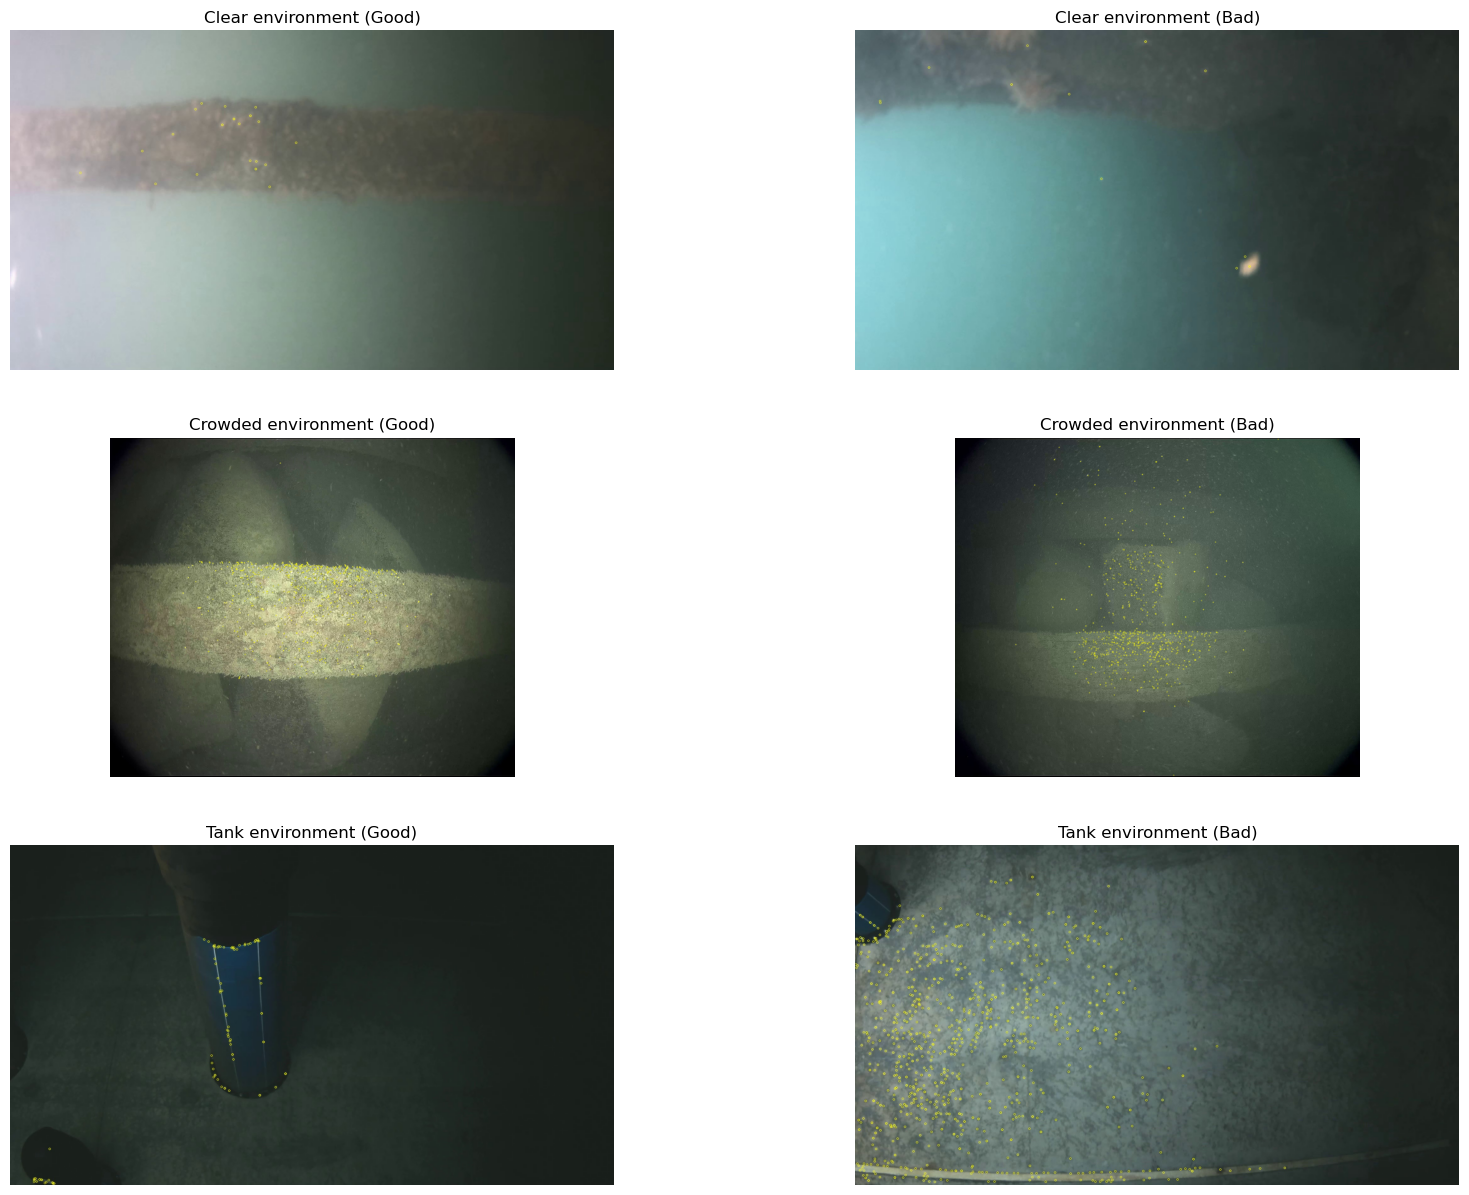

In [7]:
import cv2 
from matplotlib import pyplot as plt 

# figure 
image_figure = plt.figure(figsize=(20, 15))
rows = 3
columns = 2

# get images
clear_good = cv2.imread('../Data/feature_images/frame_normal_0.jpg',cv2.IMREAD_UNCHANGED)
clear_good = cv2.cvtColor(clear_good, cv2.COLOR_BGR2RGB)
clear_bad = cv2.imread('../Data/feature_images/frame_normal_45.jpg',cv2.IMREAD_UNCHANGED) 
clear_bad = cv2.cvtColor(clear_bad, cv2.COLOR_BGR2RGB)
crowded_good = cv2.imread('../Data/feature_images/frame_normal_crowded_17.jpg',cv2.IMREAD_UNCHANGED)
crowded_good = cv2.cvtColor(crowded_good, cv2.COLOR_BGR2RGB)
crowded_bad = cv2.imread('../Data/feature_images/frame_normal_crowded_12.jpg',cv2.IMREAD_UNCHANGED)
crowded_bad = cv2.cvtColor(crowded_bad, cv2.COLOR_BGR2RGB)
tank_good = cv2.imread('../Data/feature_images/frame_normal_tank_18.jpg',cv2.IMREAD_UNCHANGED)
tank_good = cv2.cvtColor(tank_good, cv2.COLOR_BGR2RGB)
tank_bad = cv2.imread('../Data/feature_images/frame_normal_tank_1.jpg',cv2.IMREAD_UNCHANGED)
tank_bad = cv2.cvtColor(tank_bad, cv2.COLOR_BGR2RGB)

# add images to figure
image_figure.add_subplot(rows, columns, 1)
plt.imshow(clear_good) 
plt.axis('off') 
plt.title("Clear environment (Good)") 

image_figure.add_subplot(rows, columns, 2)
plt.imshow(clear_bad) 
plt.axis('off') 
plt.title("Clear environment (Bad)")

image_figure.add_subplot(rows, columns, 3)
plt.imshow(crowded_good) 
plt.axis('off') 
plt.title("Crowded environment (Good)") 

image_figure.add_subplot(rows, columns, 4)
plt.imshow(crowded_bad) 
plt.axis('off') 
plt.title("Crowded environment (Bad)")

image_figure.add_subplot(rows, columns, 5)
plt.imshow(tank_good) 
plt.axis('off') 
plt.title("Tank environment (Good)")

image_figure.add_subplot(rows, columns, 6)
plt.imshow(tank_bad) 
plt.axis('off') 
plt.title("Tank environment (Bad)") 


From these images we can identify what causes the error features in each test environment. In the clear environment, specs of organic material floating in the water might cause false readings as well as light reflecting of other sedements moved by the flow of water. <br>

In the crowded environment, other objects in the frame result in most false readings, especially if the objects are closer or as close to the camera as the pillars themselves. Low light also seem to allow for impurities/shadows to be caught as features. <br>

In the tank environment, the miscolourisation of the concrete backdrop as well as connection lines between plates produce alot of false readings, especially in good lighting. The problem is mitigated by being further away from the backdrop and having slightly less light. <br>

Finally the performance of feature matches between frames will be analysed.

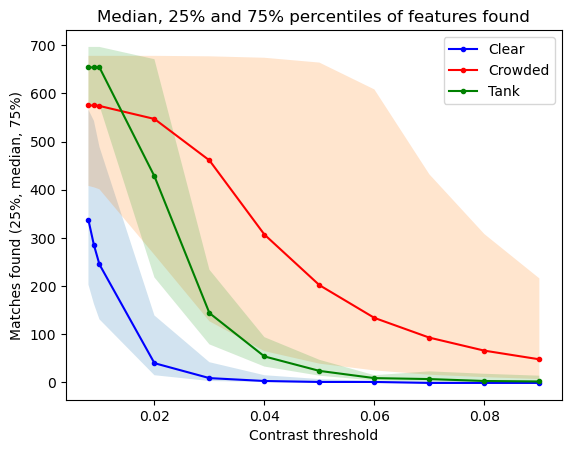

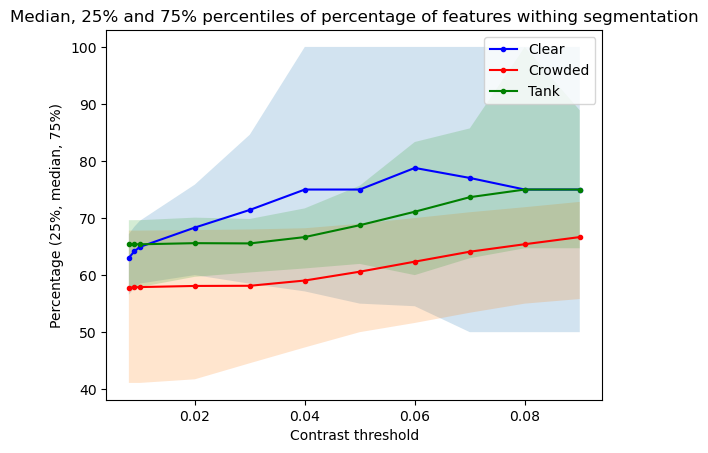

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Clean percentage data
valid_samples_percentages_clear = []
all_match_percentages_clear_clean = []

valid_samples_percentages_crowded = []
all_match_percentages_crowded_clean = []

valid_samples_percentages_tank = []
all_match_percentages_tank_clean = []


for i in range(len(all_match_percentages_clear)):
    clean_temp = clean_data(all_match_percentages_clear[i])
    all_match_percentages_clear_clean.append(clean_temp)

    clean_temp = clean_data(all_match_percentages_crowded[i])
    all_match_percentages_crowded_clean.append(clean_temp)

    clean_temp = clean_data(all_match_percentages_tank[i])
    all_match_percentages_tank_clean.append(clean_temp)

# Find medians and quantiles
medians = []
percentiles_25 = []
percentiles_75 = []

match_environments = [all_match_counts_clear, all_match_counts_crowded, all_match_counts_tank]
percentage_environments = [all_match_percentages_clear_clean,all_match_percentages_crowded_clean,all_match_percentages_tank_clean]

for i in range(len(match_environments)):
    match_medians = []
    match_percentiles_25 = []
    match_percentiles_75 = []
    percentage_medians = []
    percentage_percentiles_25 = []
    percentage_percentiles_75 = []
    
    for j in range(number_of_tests):     
        match_medians.append(statistics.median(match_environments[i][j]))
        match_percentiles_25.append(np.percentile(match_environments[i][j], 25))
        match_percentiles_75.append(np.percentile(match_environments[i][j], 75))
        
        percentage_medians.append(statistics.median(percentage_environments[i][j]))
        percentage_percentiles_25.append(np.percentile(percentage_environments[i][j], 25))
        percentage_percentiles_75.append(np.percentile(percentage_environments[i][j], 75))

    medians.append([match_medians,percentage_medians])
    percentiles_25.append([match_percentiles_25,percentage_percentiles_25])
    percentiles_75.append([match_percentiles_75,percentage_percentiles_75])

# Data structure: environment -> test category -> contrast threshold setting

# Number of matches is plotted
plt.plot(contrast_thresholds,medians[0][0],marker='.',color='b',label="Clear")
plt.fill_between(contrast_thresholds, percentiles_25[0][0],percentiles_75[0][0], alpha=0.2)

plt.plot(contrast_thresholds,medians[1][0],marker='.',color='r',label="Crowded")
plt.fill_between(contrast_thresholds, percentiles_25[1][0],percentiles_75[1][0], alpha=0.2)

plt.plot(contrast_thresholds,medians[2][0],marker='.',color='g',label="Tank")
plt.fill_between(contrast_thresholds, percentiles_25[2][0],percentiles_75[2][0], alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Matches found (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of matches found')
plt.legend()
plt.show()

# Percentage is plotted
plt.plot(contrast_thresholds,medians[0][1],marker='.',color='b',label="Clear")
plt.fill_between(contrast_thresholds, percentiles_25[0][1],percentiles_75[0][1], alpha=0.2)

plt.plot(contrast_thresholds,medians[1][1],marker='.',color='r',label="Crowded")
plt.fill_between(contrast_thresholds, percentiles_25[1][1],percentiles_75[1][1], alpha=0.2)

plt.plot(contrast_thresholds,medians[2][1],marker='.',color='g',label="Tank")
plt.fill_between(contrast_thresholds, percentiles_25[2][1],percentiles_75[2][1], alpha=0.2)

plt.xlabel('Contrast threshold')
plt.ylabel('Percentage (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of percentage matches compared to features')
plt.legend()
plt.show()

As expected, a higher percentage of matches are found, when only the few very visible features are present. The change is however only around 10 percent, which makes me want to prioritize having some features to work with. It can also be seen that the full crowded dataset actually have a lot of moments, where less than the maximum features are found. This is most likely due to me choosing frames with pillars in them (which are more crowded than any turns away from them) in order to have something to segment.

## Edge threshold

The edge threshold is used to filter out edge features. The larger the value, the more edge-like features will be retained, while lower values will filter them away.

The remaining variable where kept constant at the following values:<br>
Layers: 3<br>
Contrast threshold: 0.02<br>
Sigma: 1.6<br>
With precise upscaling disabled.<br>

In [11]:
import csv

# Paths
paths_clear = []
paths_crowded = []
paths_tank = []

# Other variables
number_of_tests = 60
edge_thresholds = []
for i in range(number_of_tests):
    edge_thresholds.append(i+1)

# Get all file paths
for i in range(number_of_tests):
    path_clear = '../Data/Sift/Clear_Dataset/edge_test_'+ str(i) +'_results.csv'
    path_crowded = '../Data/Sift/Crowded_Dataset/edge_test_'+ str(i) +'_results.csv'
    path_tank = '../Data/Sift/Tank_Dataset/edge_test_'+ str(i) +'_results.csv'
    paths_clear.append(path_clear)
    paths_crowded.append(path_crowded)
    paths_tank.append(path_tank)

# Extract desired information
all_feature_counts_clear, all_percentages_clear, all_time_counts_clear = read_segmentation_results(paths_clear)
all_feature_counts_crowded, all_percentages_crowded, all_time_counts_crowded = read_segmentation_results(paths_crowded)
all_feature_counts_tank, all_percentages_tank, all_time_counts_tank = read_segmentation_results(paths_tank)

In [12]:
from tabulate import tabulate, SEPARATING_LINE

# remove -1 elements as it is the representation of N/A and count valid samples
valid_samples_percentages_clear = []
valid_samples_percentages_crowded = []
valid_samples_percentages_tank = []
all_percentages_clear_clean = []
all_percentages_crowded_clean = []
all_percentages_tank_clean = []

for i in range(len(all_percentages_clear)):
    clean_temp = clean_data(all_percentages_clear[i])
    all_percentages_clear_clean.append(clean_temp)
    valid_samples_percentages_clear.append(len(all_percentages_clear_clean[i]))
    
for i in range(len(all_percentages_crowded)):
    clean_temp = clean_data(all_percentages_crowded[i])
    all_percentages_crowded_clean.append(clean_temp)
    valid_samples_percentages_crowded.append(len(all_percentages_crowded_clean[i]))

for i in range(len(all_percentages_tank)):
    clean_temp = clean_data(all_percentages_tank[i])
    all_percentages_tank_clean.append(clean_temp)
    valid_samples_percentages_tank.append(len(all_percentages_tank_clean[i]))

# Create headers
headers = ["edge threshold","valid samples", "total samples", "percentage valid"]

# Prepare table data
table_data = [[],[],[]]
enviroments = ["Clear", "Crowded", "Tank"]
valid_environments = [valid_samples_percentages_clear, valid_samples_percentages_crowded, valid_samples_percentages_tank]
complete_environments = [all_percentages_clear,all_percentages_crowded,all_percentages_tank]
for i in range(len(enviroments)):
    row = []
    for j in range(len(edge_thresholds)):
        row = [edge_thresholds[j],valid_environments[i][j],len(complete_environments[i][j]),(valid_environments[i][j]/len(complete_environments[i][j]))*100.0]
        table_data[i].append(row)

#display table
for i in range(len(enviroments)):
    print(enviroments[i]+":")
    print(tabulate(table_data[i], headers=headers,tablefmt="heavy_grid", numalign="right", floatfmt=".2f"))

Clear:
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃   edge threshold ┃   valid samples ┃   total samples ┃   percentage valid ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                1 ┃               0 ┃             150 ┃               0.00 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                2 ┃             146 ┃             150 ┃              97.33 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                3 ┃             147 ┃             150 ┃              98.00 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                4 ┃             148 ┃             150 ┃              98.67 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃                5 ┃             148 ┃             150 ┃              98.67 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━

The percentage data for edge thresholds of one are unusable, since no valid samples exists. It can however be seen that almost all other values reach approximately 100 percent validity. Results from the edge threshold of one are ignored for testing purposes.

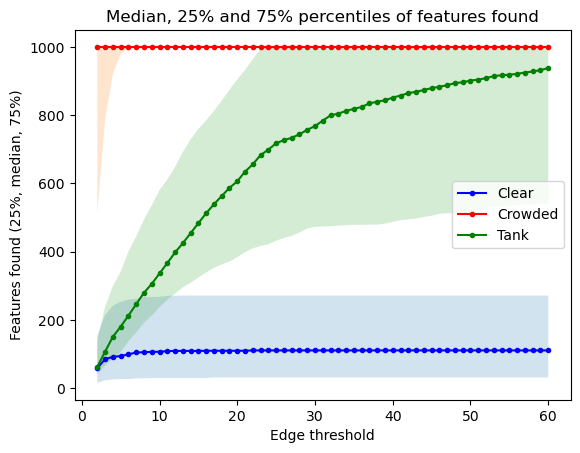

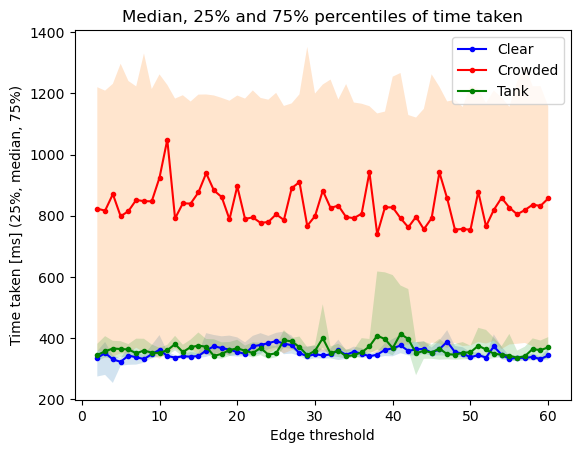

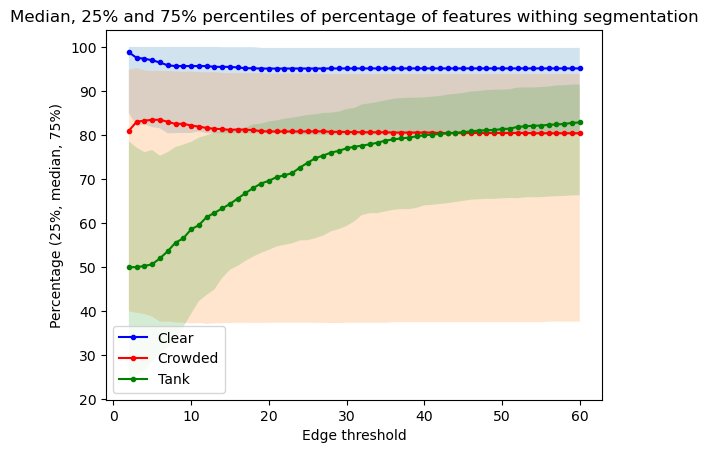

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 

# Remove edge threshold 1 results, because invalid:
edge_thresholds = []
for i in range(number_of_tests):
    if(i > 0):
        edge_thresholds.append(i+1)

# Find medians and quantiles
medians = []
percentiles_25 = []
percentiles_75 = []

feature_environments = [all_feature_counts_clear,all_feature_counts_crowded,all_feature_counts_tank]
time_environments = [all_time_counts_clear,all_time_counts_crowded,all_time_counts_tank]
percentage_environments = [all_percentages_clear_clean,all_percentages_crowded_clean,all_percentages_tank_clean]

for i in range(len(enviroments)):
    feature_medians = []
    feature_percentiles_25 = []
    feature_percentiles_75 = []
    time_medians = []
    time_percentiles_25 = []
    time_percentiles_75 = []
    percentage_medians = []
    percentage_percentiles_25 = []
    percentage_percentiles_75 = []
    
    for j in range(number_of_tests):
        if(j > 0):
            feature_medians.append(statistics.median(feature_environments[i][j]))
            feature_percentiles_25.append(np.percentile(feature_environments[i][j], 25))
            feature_percentiles_75.append(np.percentile(feature_environments[i][j], 75))
        
            time_medians.append(statistics.median(time_environments[i][j]))
            time_percentiles_25.append(np.percentile(time_environments[i][j], 25))
            time_percentiles_75.append(np.percentile(time_environments[i][j], 75))
        
            percentage_medians.append(statistics.median(percentage_environments[i][j]))
            percentage_percentiles_25.append(np.percentile(percentage_environments[i][j], 25))
            percentage_percentiles_75.append(np.percentile(percentage_environments[i][j], 75))

    medians.append([feature_medians,time_medians,percentage_medians])
    percentiles_25.append([feature_percentiles_25,time_percentiles_25,percentage_percentiles_25])
    percentiles_75.append([feature_percentiles_75,time_percentiles_75,percentage_percentiles_75])

# Data structure: environment -> test category -> edge threshold setting

# Number of features is plotted
plt.plot(edge_thresholds,medians[0][0],marker='.',color='b',label="Clear")
plt.fill_between(edge_thresholds, percentiles_25[0][0],percentiles_75[0][0], alpha=0.2)

plt.plot(edge_thresholds,medians[1][0],marker='.',color='r',label="Crowded")
plt.fill_between(edge_thresholds, percentiles_25[1][0],percentiles_75[1][0], alpha=0.2)

plt.plot(edge_thresholds,medians[2][0],marker='.',color='g',label="Tank")
plt.fill_between(edge_thresholds, percentiles_25[2][0],percentiles_75[2][0], alpha=0.2)

plt.xlabel('Edge threshold')
plt.ylabel('Features found (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of features found')
plt.legend()
plt.savefig("edge_feature_graph.jpg")
plt.show()


# Time taken is plotted
plt.plot(edge_thresholds,medians[0][1],marker='.',color='b',label="Clear")
plt.fill_between(edge_thresholds, percentiles_25[0][1],percentiles_75[0][1], alpha=0.2)

plt.plot(edge_thresholds,medians[1][1],marker='.',color='r',label="Crowded")
plt.fill_between(edge_thresholds, percentiles_25[1][1],percentiles_75[1][1], alpha=0.2)

plt.plot(edge_thresholds,medians[2][1],marker='.',color='g',label="Tank")
plt.fill_between(edge_thresholds, percentiles_25[2][1],percentiles_75[2][1], alpha=0.2)

plt.xlabel('Edge threshold')
plt.ylabel('Time taken [ms] (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of time taken')
plt.legend()
plt.savefig("edge_time_graph.jpg")
plt.show()

# Percentage is plotted
plt.plot(edge_thresholds,medians[0][2],marker='.',color='b',label="Clear")
plt.fill_between(edge_thresholds, percentiles_25[0][2],percentiles_75[0][2], alpha=0.2)

plt.plot(edge_thresholds,medians[1][2],marker='.',color='r',label="Crowded")
plt.fill_between(edge_thresholds, percentiles_25[1][2],percentiles_75[1][2], alpha=0.2)

plt.plot(edge_thresholds,medians[2][2],marker='.',color='g',label="Tank")
plt.fill_between(edge_thresholds, percentiles_25[2][2],percentiles_75[2][2], alpha=0.2)

plt.xlabel('Edge threshold')
plt.ylabel('Percentage (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of percentage of features withing segmentation')
plt.legend()
plt.savefig("edge_percentage_graph.jpg")
plt.show()

# Find layer with best median value
final_sum = 0
final_layer = 0
for j in range(number_of_tests):
    median_sum = medians[0][2][j]+medians[1][2][j]+medians[2][2][j]
    if median_sum > final_sum:
        final_sum = median_sum
        final_layer = layers[j]
print("The best median performance is at layer: " + str(final_layer) + " with a percentage sum of " + str(final_sum))

The tendency of increasing the edge threshold leads to increased number of features is clearly seen in this analysis. The crowded environment hits saturation very fast, with no diviance from the 1000 features. The clear environment also hits its own saturation fast, reaching a point where the percentiles and median seem to stabalise. The tank envionment keeps increasing without hitting its saturation. The time analysis is as stable for all test environment as the contrast threshold tests. <br>

The accuracy of the desired features also seem to stabalise somewhat for both clear and crowded environments, however with a slight decrease. The tank environment however see a stark increase in accuracy with the increase in edge threshold, likely due to the very line-likes stribes on the pipes within the environment. <br>

When choosing an edge threshold, it is important to focus on the accuracy but also if removing outliers is possible. From this analysis alone it seems that the best compromise is having a high edge threshold, since the increase in accuracy for the tank environment out shines the decrease in both the clear and crowded environments. A quick analysis of the spread in the tank environment percentages will be performed. 

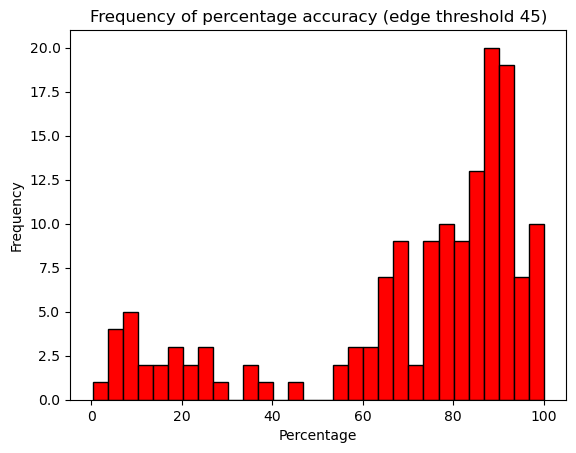

In [15]:
# Feature histotgram for tank percentages
n_bins = 30
plt.hist(all_percentages_tank[45] ,bins=n_bins,color='r', density=False,edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Frequency of percentage accuracy (edge threshold 45)')
plt.savefig("edge_percentage_histogram.jpg")
plt.show()

Here it seems that there is a slight split between frames performing well and frames performing badly. This is most likely due to some frames containing very little of the desired structures. This will make it more likely that false readings outnumber desired features. Images of the features detected using a small (five), medium (30) and high (60) edge thresholds are analysed to determine if having an increased edge threshold is benefical. 

Text(0.5, 1.0, 'Crowded environment (High)')

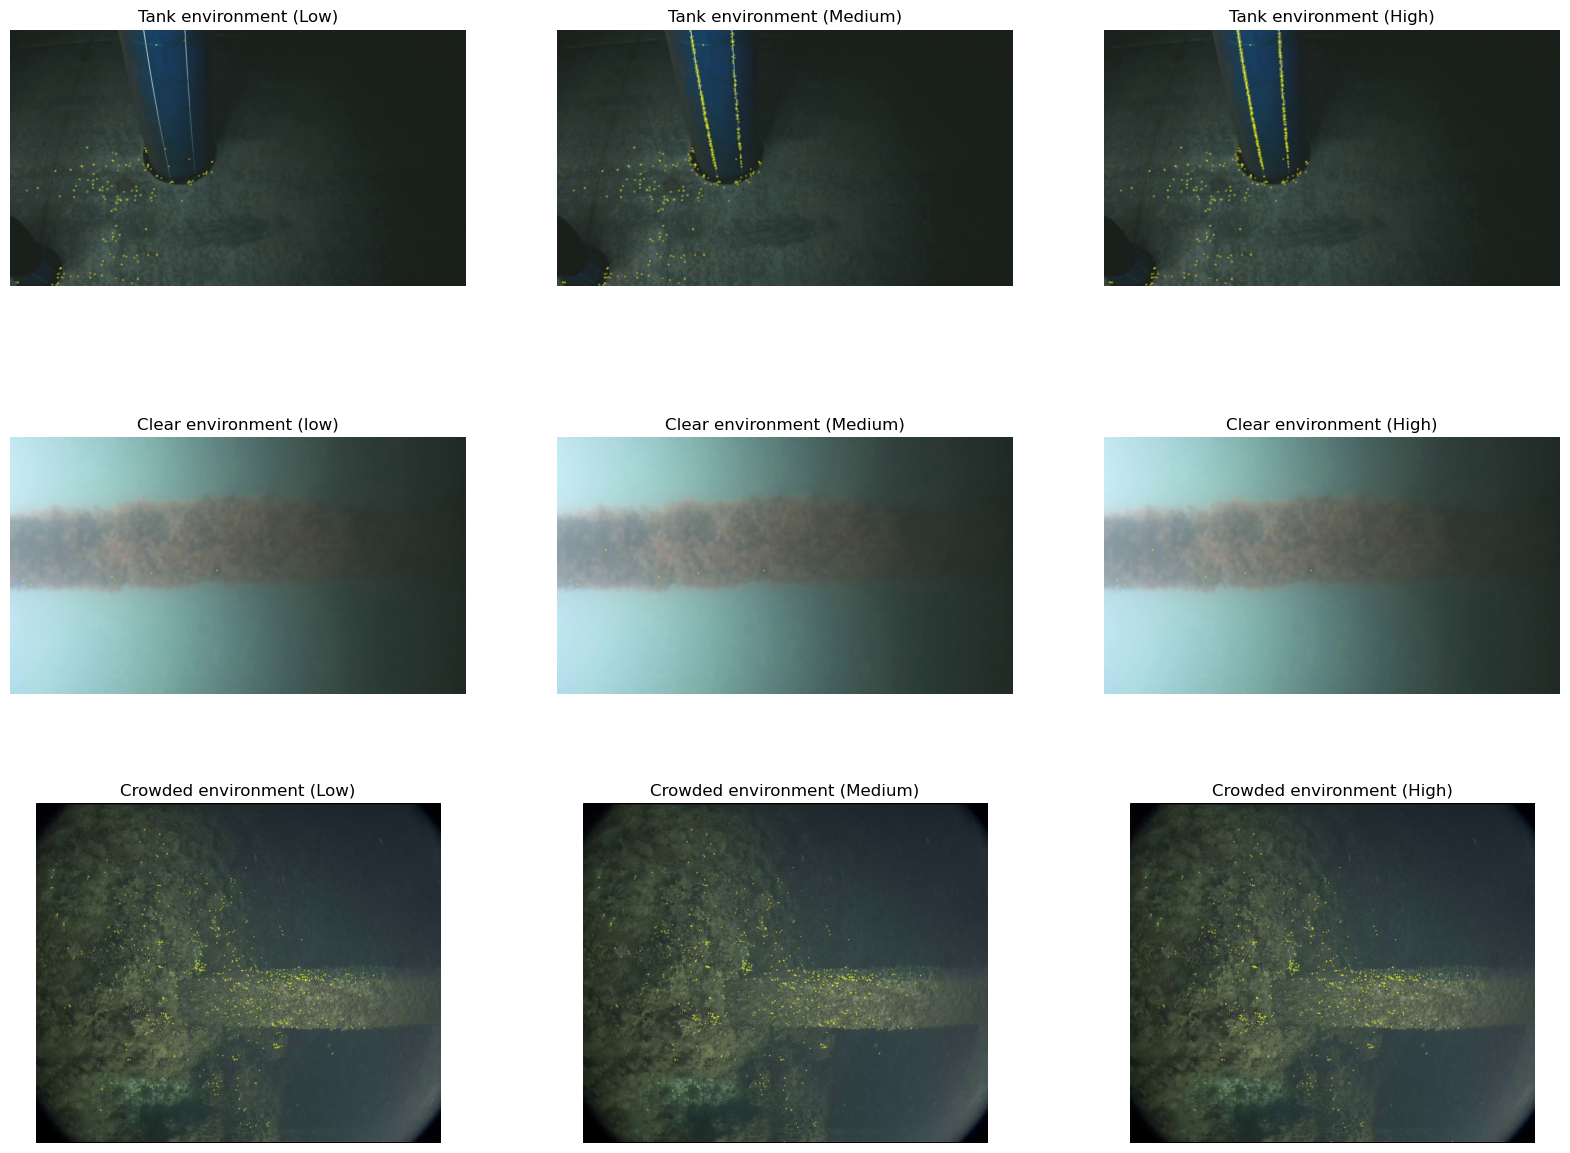

In [5]:
import cv2 
from matplotlib import pyplot as plt 

# figure 
image_figure = plt.figure(figsize=(20, 15))
rows = 3
columns = 3

# get images
tank_low = cv2.imread('../Data/feature_images/edge_low_frame_normal_tank_13.jpg',cv2.IMREAD_UNCHANGED)
tank_low = cv2.cvtColor(tank_low, cv2.COLOR_BGR2RGB)
tank_medium = cv2.imread('../Data/feature_images/edge_medium_frame_normal_tank_13.jpg',cv2.IMREAD_UNCHANGED)
tank_medium = cv2.cvtColor(tank_medium, cv2.COLOR_BGR2RGB)
tank_high = cv2.imread('../Data/feature_images/edge_high_frame_normal_tank_13.jpg',cv2.IMREAD_UNCHANGED)
tank_high = cv2.cvtColor(tank_high, cv2.COLOR_BGR2RGB)

clear_low = cv2.imread('../Data/feature_images/edge_low_frame_normal_clear_22.jpg',cv2.IMREAD_UNCHANGED)
clear_low = cv2.cvtColor(clear_low, cv2.COLOR_BGR2RGB)
clear_medium = cv2.imread('../Data/feature_images/edge_medium_frame_normal_clear_22.jpg',cv2.IMREAD_UNCHANGED)
clear_medium = cv2.cvtColor(clear_medium, cv2.COLOR_BGR2RGB)
clear_high = cv2.imread('../Data/feature_images/edge_high_frame_normal_clear_22.jpg',cv2.IMREAD_UNCHANGED)
clear_high = cv2.cvtColor(clear_high, cv2.COLOR_BGR2RGB)

crowded_low = cv2.imread('../Data/feature_images/edge_low_frame_normal_crowded_32.jpg',cv2.IMREAD_UNCHANGED)
crowded_low = cv2.cvtColor(crowded_low, cv2.COLOR_BGR2RGB)
crowded_medium = cv2.imread('../Data/feature_images/edge_medium_frame_normal_crowded_32.jpg',cv2.IMREAD_UNCHANGED)
crowded_medium = cv2.cvtColor(crowded_medium, cv2.COLOR_BGR2RGB)
crowded_high = cv2.imread('../Data/feature_images/edge_high_frame_normal_crowded_32.jpg',cv2.IMREAD_UNCHANGED)
crowded_high = cv2.cvtColor(crowded_high, cv2.COLOR_BGR2RGB)

# add images to figure
image_figure.add_subplot(rows, columns, 1)
plt.imshow(tank_low) 
plt.axis('off') 
plt.title("Tank environment (Low)") 

image_figure.add_subplot(rows, columns, 2)
plt.imshow(tank_medium) 
plt.axis('off') 
plt.title("Tank environment (Medium)")

image_figure.add_subplot(rows, columns, 3)
plt.imshow(tank_high) 
plt.axis('off') 
plt.title("Tank environment (High)")

image_figure.add_subplot(rows, columns, 4)
plt.imshow(clear_low) 
plt.axis('off') 
plt.title("Clear environment (low)")

image_figure.add_subplot(rows, columns, 5)
plt.imshow(clear_medium) 
plt.axis('off') 
plt.title("Clear environment (Medium)")

image_figure.add_subplot(rows, columns, 6)
plt.imshow(clear_high) 
plt.axis('off') 
plt.title("Clear environment (High)")

image_figure.add_subplot(rows, columns, 7)
plt.imshow(crowded_low) 
plt.axis('off') 
plt.title("Crowded environment (Low)")

image_figure.add_subplot(rows, columns, 8)
plt.imshow(crowded_medium) 
plt.axis('off') 
plt.title("Crowded environment (Medium)")

image_figure.add_subplot(rows, columns, 9)
plt.imshow(crowded_high) 
plt.axis('off') 
plt.title("Crowded environment (High)")


From these images, the results can be explained quite well. The tank environment performs better since the pipes themselves contain lines, that can be used to identify them. The noise of the background is however very far from line structures meaning that increasing the line threshold will add more features to the pipes than it will add in other places. The other two environments see little change. Only a couple of features are added, some on the pillars themselves but also some on undesired objects, keeping the percentage of desired features somewhat stable. Because of this the best choice for a multi-environment system is an edge threshold of around 43.

## Layers

The number of layers determines at how many scales we analyse the image. The value used in the official paper is 3. The number of octaves is calculated automatically by OpenCV using the image resolution. The idea is that using more layers will increased to quality of the features since they will be more scale invariant.

The remaining variable where kept constant at the following values:<br>
Edge threshold: 43<br>
Contrast threshold: 0.02<br>
Sigma: 1.6<br>
With precise upscaling disabled.<br>

In [3]:
import csv

# Paths
paths_clear = []
paths_crowded = []
paths_tank = []

# Other variables
number_of_tests = 10
layers = []
for i in range(number_of_tests):
    layers.append(i+1)

# Get all file paths
for i in range(number_of_tests):
    path_clear = '../Data/Sift/Clear_Dataset/layer_test_'+ str(i) +'_results.csv'
    path_crowded = '../Data/Sift/Crowded_Dataset/layer_test_'+ str(i) +'_results.csv'
    path_tank = '../Data/Sift/Tank_Dataset/layer_test_'+ str(i) +'_results.csv'
    paths_clear.append(path_clear)
    paths_crowded.append(path_crowded)
    paths_tank.append(path_tank)

# Extract desired information
all_feature_counts_clear, all_percentages_clear, all_time_counts_clear = read_segmentation_results(paths_clear)
all_feature_counts_crowded, all_percentages_crowded, all_time_counts_crowded = read_segmentation_results(paths_crowded)
all_feature_counts_tank, all_percentages_tank, all_time_counts_tank = read_segmentation_results(paths_tank)

In [4]:
from tabulate import tabulate, SEPARATING_LINE

# remove -1 elements as it is the representation of N/A and count valid samples
valid_samples_percentages_clear = []
valid_samples_percentages_crowded = []
valid_samples_percentages_tank = []

all_percentages_clear_clean = []
all_percentages_crowded_clean = []
all_percentages_tank_clean = []

for i in range(len(all_percentages_clear)):
    clean_temp = clean_data(all_percentages_clear[i])
    all_percentages_clear_clean.append(clean_temp)
    valid_samples_percentages_clear.append(len(all_percentages_clear_clean[i]))
    
for i in range(len(all_percentages_crowded)):
    clean_temp = clean_data(all_percentages_crowded[i])
    all_percentages_crowded_clean.append(clean_temp)
    valid_samples_percentages_crowded.append(len(all_percentages_crowded_clean[i]))

for i in range(len(all_percentages_tank)):
    clean_temp = clean_data(all_percentages_tank[i])
    all_percentages_tank_clean.append(clean_temp)
    valid_samples_percentages_tank.append(len(all_percentages_tank_clean[i]))

# Create headers
headers = ["layers","valid samples", "total samples", "percentage valid"]

# Prepare table data
table_data = [[],[],[]]
enviroments = ["Clear", "Crowded", "Tank"]
valid_environments = [valid_samples_percentages_clear, valid_samples_percentages_crowded, valid_samples_percentages_tank]
complete_environments = [all_percentages_clear,all_percentages_crowded,all_percentages_tank]
for i in range(len(enviroments)):
    row = []
    for j in range(len(layers)):
        row = [layers[j],valid_environments[i][j],len(complete_environments[i][j]),(valid_environments[i][j]/len(complete_environments[i][j]))*100.0]
        table_data[i].append(row)

#display table
for i in range(len(enviroments)):
    print(enviroments[i]+":")
    print(tabulate(table_data[i], headers=headers,tablefmt="heavy_grid", numalign="right", floatfmt=".2f"))

Clear:
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃   layers ┃   valid samples ┃   total samples ┃   percentage valid ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        1 ┃             150 ┃             150 ┃             100.00 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        2 ┃             150 ┃             150 ┃             100.00 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        3 ┃             150 ┃             150 ┃             100.00 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        4 ┃             150 ┃             150 ┃             100.00 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        5 ┃             149 ┃             150 ┃              99.33 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        6 ┃             149 ┃             150 ┃              99.33 ┃
┣━━━━━━━━━━╋━

Almost complete validity can be seen. Only at some high number of layers the clear dataset looses a couple of frames.

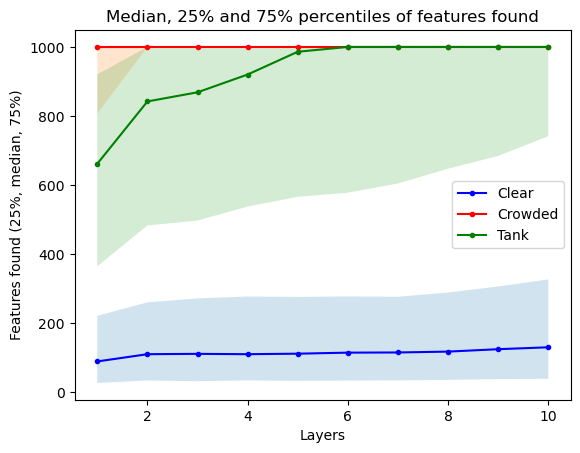

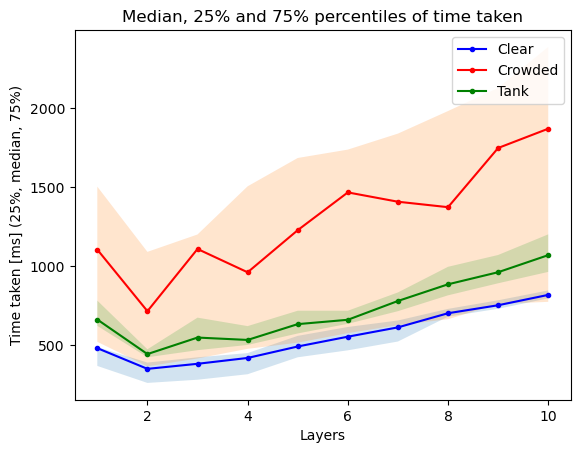

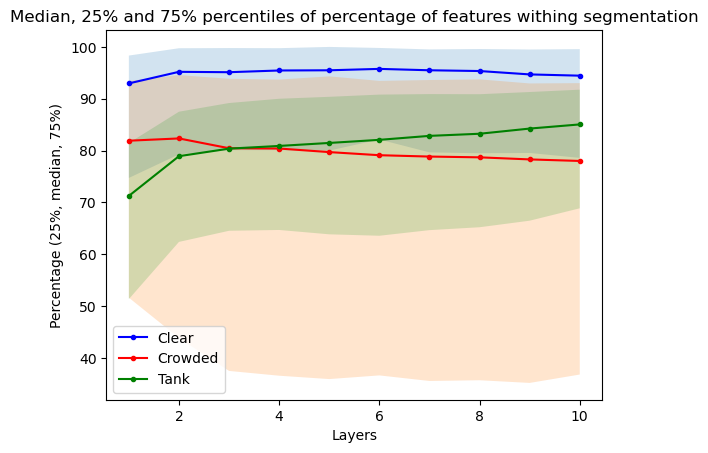

The best median performance is at layer: 10 with a percentage sum of 257.5047


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 

# Find medians and quantiles
medians = []
percentiles_25 = []
percentiles_75 = []

feature_environments = [all_feature_counts_clear,all_feature_counts_crowded,all_feature_counts_tank]
time_environments = [all_time_counts_clear,all_time_counts_crowded,all_time_counts_tank]
percentage_environments = [all_percentages_clear_clean,all_percentages_crowded_clean,all_percentages_tank_clean]

for i in range(len(enviroments)):
    feature_medians = []
    feature_percentiles_25 = []
    feature_percentiles_75 = []
    time_medians = []
    time_percentiles_25 = []
    time_percentiles_75 = []
    percentage_medians = []
    percentage_percentiles_25 = []
    percentage_percentiles_75 = []
    
    for j in range(number_of_tests):
        feature_medians.append(statistics.median(feature_environments[i][j]))
        feature_percentiles_25.append(np.percentile(feature_environments[i][j], 25))
        feature_percentiles_75.append(np.percentile(feature_environments[i][j], 75))
        
        time_medians.append(statistics.median(time_environments[i][j]))
        time_percentiles_25.append(np.percentile(time_environments[i][j], 25))
        time_percentiles_75.append(np.percentile(time_environments[i][j], 75))
        
        percentage_medians.append(statistics.median(percentage_environments[i][j]))
        percentage_percentiles_25.append(np.percentile(percentage_environments[i][j], 25))
        percentage_percentiles_75.append(np.percentile(percentage_environments[i][j], 75))

    medians.append([feature_medians,time_medians,percentage_medians])
    percentiles_25.append([feature_percentiles_25,time_percentiles_25,percentage_percentiles_25])
    percentiles_75.append([feature_percentiles_75,time_percentiles_75,percentage_percentiles_75])

# Data structure: environment -> test category -> layer setting

# Number of features is plotted
plt.plot(layers,medians[0][0],marker='.',color='b',label="Clear")
plt.fill_between(layers, percentiles_25[0][0],percentiles_75[0][0], alpha=0.2)

plt.plot(layers,medians[1][0],marker='.',color='r',label="Crowded")
plt.fill_between(layers, percentiles_25[1][0],percentiles_75[1][0], alpha=0.2)

plt.plot(layers,medians[2][0],marker='.',color='g',label="Tank")
plt.fill_between(layers, percentiles_25[2][0],percentiles_75[2][0], alpha=0.2)

plt.xlabel('Layers')
plt.ylabel('Features found (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of features found')
plt.legend()
plt.savefig("layer_feature_graph.jpg")
plt.show()


# Time taken is plotted
plt.plot(layers,medians[0][1],marker='.',color='b',label="Clear")
plt.fill_between(layers, percentiles_25[0][1],percentiles_75[0][1], alpha=0.2)

plt.plot(layers,medians[1][1],marker='.',color='r',label="Crowded")
plt.fill_between(layers, percentiles_25[1][1],percentiles_75[1][1], alpha=0.2)

plt.plot(layers,medians[2][1],marker='.',color='g',label="Tank")
plt.fill_between(layers, percentiles_25[2][1],percentiles_75[2][1], alpha=0.2)

plt.xlabel('Layers')
plt.ylabel('Time taken [ms] (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of time taken')
plt.legend()
plt.savefig("layer_time_graph.jpg")
plt.show()

# Percentage is plotted
plt.plot(layers,medians[0][2],marker='.',color='b',label="Clear")
plt.fill_between(layers, percentiles_25[0][2],percentiles_75[0][2], alpha=0.2)

plt.plot(layers,medians[1][2],marker='.',color='r',label="Crowded")
plt.fill_between(layers, percentiles_25[1][2],percentiles_75[1][2], alpha=0.2)

plt.plot(layers,medians[2][2],marker='.',color='g',label="Tank")
plt.fill_between(layers, percentiles_25[2][2],percentiles_75[2][2], alpha=0.2)

plt.xlabel('Layers')
plt.ylabel('Percentage (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of percentage of features withing segmentation')
plt.legend()
plt.savefig("layer_percentage_graph.jpg")
plt.show()

# Find layer with best median value
final_sum = 0
final_layer = 0
for j in range(number_of_tests):
    median_sum = medians[0][2][j]+medians[1][2][j]+medians[2][2][j]
    if median_sum > final_sum:
        final_sum = median_sum
        final_layer = layers[j]
print("The best median performance is at layer: " + str(final_layer) + " with a percentage sum of " + str(final_sum))

These results show that the amount of features in the tank envrionment can easily be increased with the increase in layers, while the other environments remain stable. It can also be seen that the time will increase with the increase in the number of layers used. This holds for all datasets. The percentage of correct features seems to decrease for the crowded environment and increase in the tank environment. It however seem that the ideal position is a three layers, since this is where the crowded and tank performances cross. The best performing layer in terms of total median percentage is however layer 10, but it is desired that all environments have good performance. There is again an immense split in the performance of the crowded environment. Which will be analysed in a histogram.

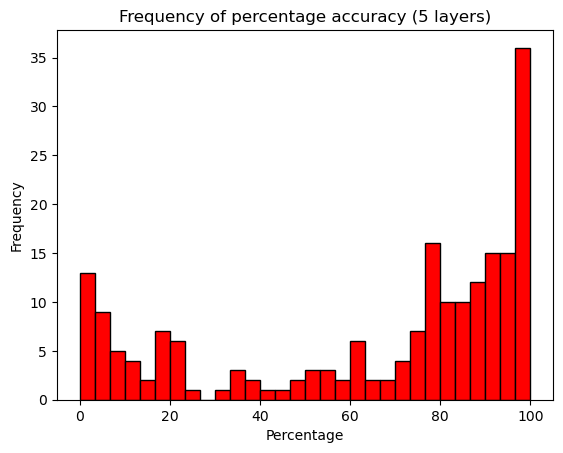

In [12]:
# Feature histotgram for crowded percentages
n_bins = 30
plt.hist(all_percentages_crowded[4] ,bins=n_bins,color='r', density=False,edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Frequency of percentage accuracy (5 layers)')
plt.savefig("layer_percentage_histogram.jpg")
plt.show()

Some frames seem to perform very badly compared to others. Images of all datasets with 5 layers with good and bad results are analysed.

Text(0.5, 1.0, 'Tank environment (Bad)')

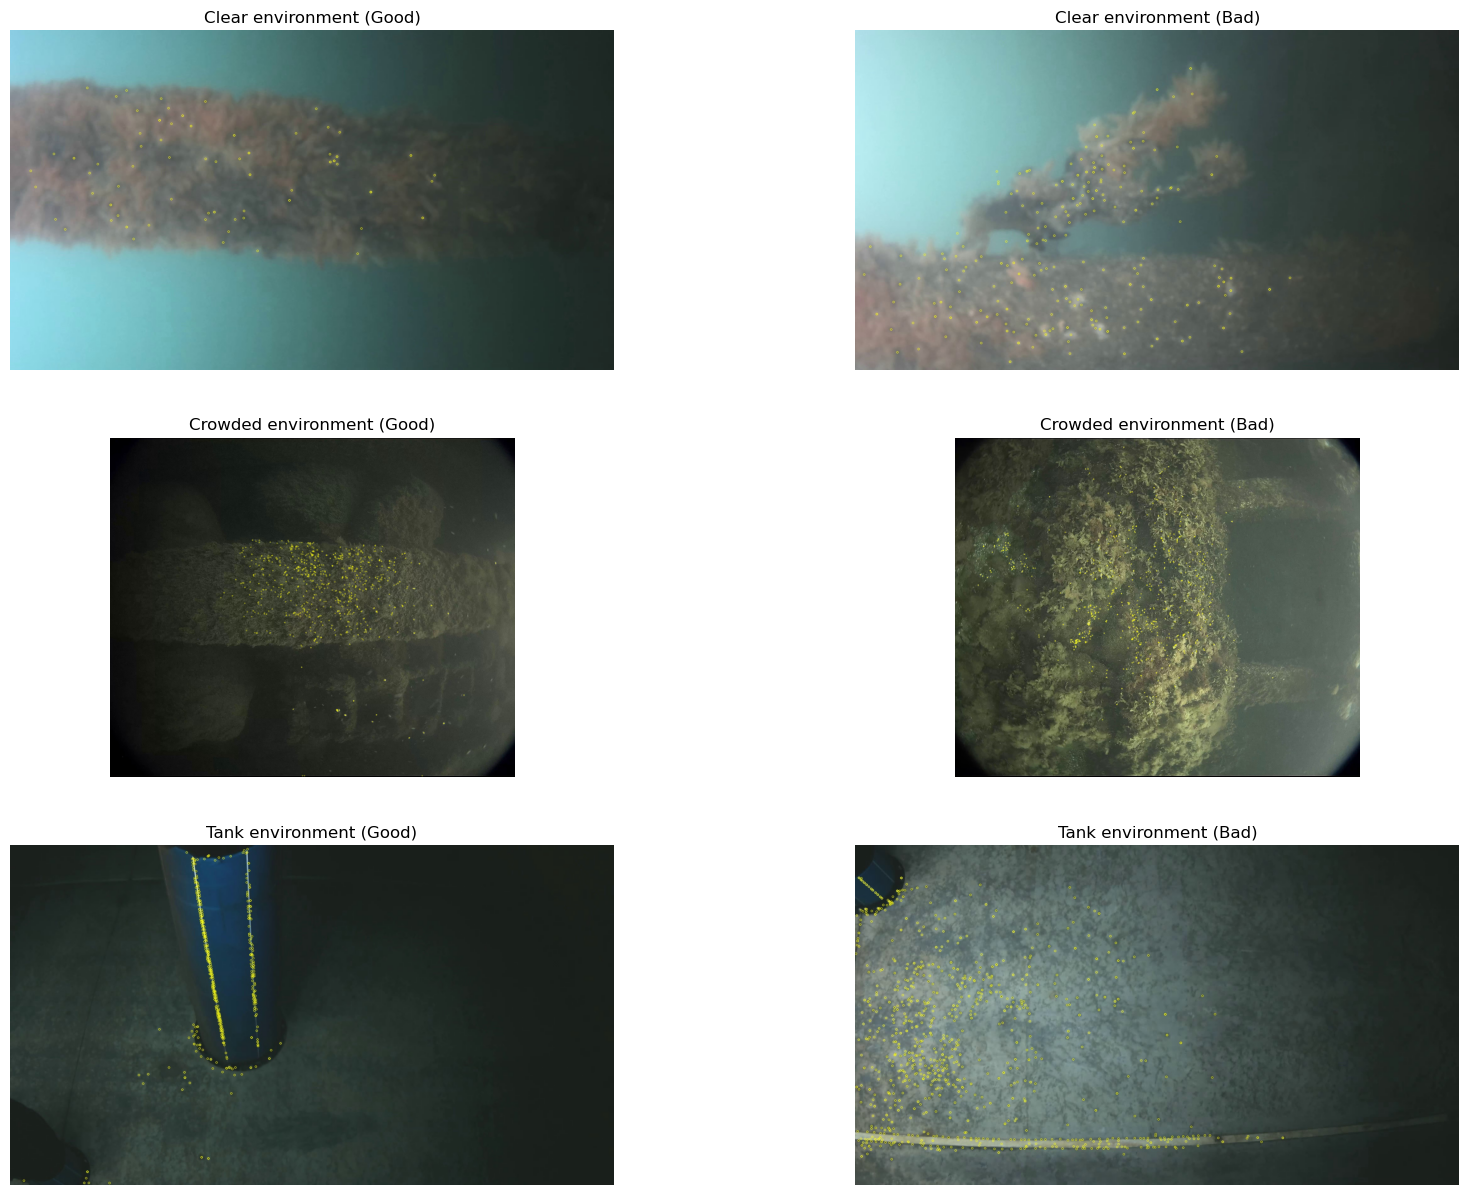

In [14]:
import cv2 
from matplotlib import pyplot as plt 

# figure 
image_figure = plt.figure(figsize=(20, 15))
rows = 3
columns = 2

# get images
clear_bad = cv2.imread('../Data/feature_images/layers_frame_normal_clear_37.jpg',cv2.IMREAD_UNCHANGED)
clear_bad = cv2.cvtColor(clear_bad, cv2.COLOR_BGR2RGB)
clear_good = cv2.imread('../Data/feature_images/layers_frame_normal_clear_28.jpg',cv2.IMREAD_UNCHANGED) 
clear_good = cv2.cvtColor(clear_good, cv2.COLOR_BGR2RGB)

crowded_good = cv2.imread('../Data/feature_images/layers_frame_normal_crowded_2_3.jpg',cv2.IMREAD_UNCHANGED)
crowded_good = cv2.cvtColor(crowded_good, cv2.COLOR_BGR2RGB)
crowded_bad = cv2.imread('../Data/feature_images/layers_frame_normal_crowded_5.jpg',cv2.IMREAD_UNCHANGED)
crowded_bad = cv2.cvtColor(crowded_bad, cv2.COLOR_BGR2RGB)

tank_good = cv2.imread('../Data/feature_images/layers_frame_normal_tank_14.jpg',cv2.IMREAD_UNCHANGED)
tank_good = cv2.cvtColor(tank_good, cv2.COLOR_BGR2RGB)
tank_bad = cv2.imread('../Data/feature_images/layers_frame_normal_tank_0.jpg',cv2.IMREAD_UNCHANGED)
tank_bad = cv2.cvtColor(tank_bad, cv2.COLOR_BGR2RGB)

# add images to figure
image_figure.add_subplot(rows, columns, 1)
plt.imshow(clear_good) 
plt.axis('off') 
plt.title("Clear environment (Good)") 

image_figure.add_subplot(rows, columns, 2)
plt.imshow(clear_bad) 
plt.axis('off') 
plt.title("Clear environment (Bad)")

image_figure.add_subplot(rows, columns, 3)
plt.imshow(crowded_good) 
plt.axis('off') 
plt.title("Crowded environment (Good)") 

image_figure.add_subplot(rows, columns, 4)
plt.imshow(crowded_bad) 
plt.axis('off') 
plt.title("Crowded environment (Bad)")

image_figure.add_subplot(rows, columns, 5)
plt.imshow(tank_good) 
plt.axis('off') 
plt.title("Tank environment (Good)")

image_figure.add_subplot(rows, columns, 6)
plt.imshow(tank_bad) 
plt.axis('off') 
plt.title("Tank environment (Bad)") 


Here many universal reasons for high deviation are showcased. The tank environment has images with very little pipe in them, having the backdrop and its impurities be lighted and in the foreground. Some crowded datasets has the pillars located further back, which creates problems for the feature detection. In the clear envrionment, some images have organic matter pertruding from the pillars themselves, which creates alot of false readings. This seems to be the case no matter the settings used so far. The only thing seen is that these bad frames are limited in their degree at only one layer. A layer of three is however kept to keep the median percentage around 80 percent for all environments. 

## Sigma

Sigma is the standard deviation used, when applying the gaussian. It is usually recomended that lower values should be used for softer camera lenses. The recomended value is 1.6, but values from 0.5 to 3.5 will be explored. <be>

The remaining variable where kept constant at the following values:<br>
Edge threshold: 43<br>
Contrast threshold: 0.02<br>
Layers: 3<br>
With precise upscaling disabled.<br>

In [7]:
import csv

# Paths
paths_clear = []
paths_crowded = []
paths_tank = []

# Other variables
number_of_tests = 31
sigmas = []
sigma = 0.5
for i in range(number_of_tests):
    sigmas.append(sigma)
    sigma = sigma+0.1

# Get all file paths
for i in range(number_of_tests):
    path_clear = '../Data/Sift/Clear_Dataset/sigma_test_'+ str(i) +'_results.csv'
    path_crowded = '../Data/Sift/Crowded_Dataset/sigma_test_'+ str(i) +'_results.csv'
    path_tank = '../Data/Sift/Tank_Dataset/sigma_test_'+ str(i) +'_results.csv'
    paths_clear.append(path_clear)
    paths_crowded.append(path_crowded)
    paths_tank.append(path_tank)

# Extract desired information
all_feature_counts_clear, all_percentages_clear, all_time_counts_clear = read_segmentation_results(paths_clear)
all_feature_counts_crowded, all_percentages_crowded, all_time_counts_crowded = read_segmentation_results(paths_crowded)
all_feature_counts_tank, all_percentages_tank, all_time_counts_tank = read_segmentation_results(paths_tank)

In [8]:
from tabulate import tabulate, SEPARATING_LINE
# remove -1 elements as it is the representation of N/A and count valid samples
valid_samples_percentages_clear = []
valid_samples_percentages_crowded = []
valid_samples_percentages_tank = []

all_percentages_clear_clean = []
all_percentages_crowded_clean = []
all_percentages_tank_clean = []

for i in range(len(all_percentages_clear)):
    clean_temp = clean_data(all_percentages_clear[i])
    all_percentages_clear_clean.append(clean_temp)
    valid_samples_percentages_clear.append(len(all_percentages_clear_clean[i]))
    
for i in range(len(all_percentages_crowded)):
    clean_temp = clean_data(all_percentages_crowded[i])
    all_percentages_crowded_clean.append(clean_temp)
    valid_samples_percentages_crowded.append(len(all_percentages_crowded_clean[i]))

for i in range(len(all_percentages_tank)):
    clean_temp = clean_data(all_percentages_tank[i])
    all_percentages_tank_clean.append(clean_temp)
    valid_samples_percentages_tank.append(len(all_percentages_tank_clean[i]))

# Create headers
headers = ["sigma","valid samples", "total samples", "percentage valid"]

# Prepare table data
table_data = [[],[],[]]
enviroments = ["Clear", "Crowded", "Tank"]
valid_environments = [valid_samples_percentages_clear, valid_samples_percentages_crowded, valid_samples_percentages_tank]
complete_environments = [all_percentages_clear,all_percentages_crowded,all_percentages_tank]
for i in range(len(enviroments)):
    row = []
    for j in range(len(sigmas)):
        row = [sigmas[j],valid_environments[i][j],len(complete_environments[i][j]),(valid_environments[i][j]/len(complete_environments[i][j]))*100.0]
        table_data[i].append(row)

#display table
for i in range(len(enviroments)):
    print(enviroments[i]+":")
    print(tabulate(table_data[i], headers=headers,tablefmt="heavy_grid", numalign="right", floatfmt=".2f"))

Clear:
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃   sigma ┃   valid samples ┃   total samples ┃   percentage valid ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃    0.50 ┃             150 ┃             150 ┃             100.00 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃    0.60 ┃             150 ┃             150 ┃             100.00 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃    0.70 ┃             149 ┃             150 ┃              99.33 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃    0.80 ┃             150 ┃             150 ┃             100.00 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃    0.90 ┃             148 ┃             150 ┃              98.67 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃    1.00 ┃             149 ┃             150 ┃              99.33 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━

Gaussian standard deviations bellow 0.3 will not work for underwater purposes, since no features are ever found.

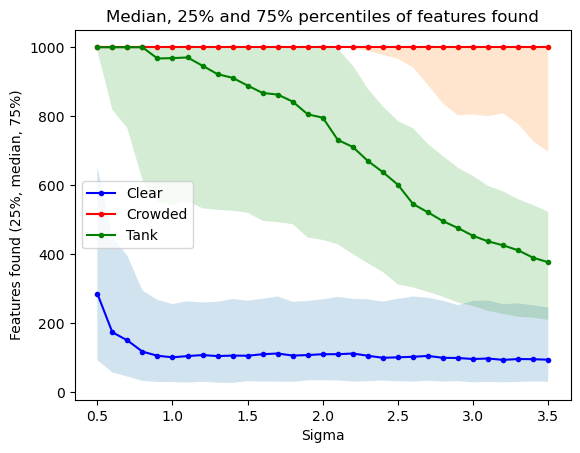

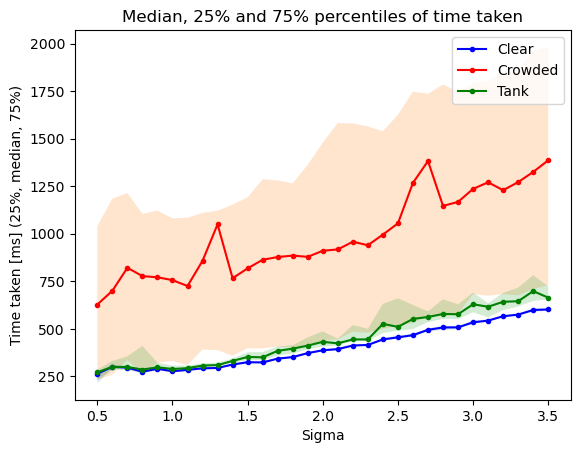

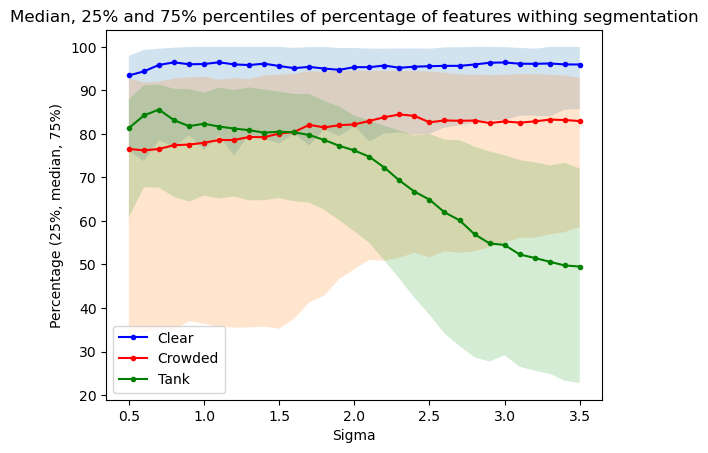

The best median performance is at sigma: 0.7 with a percentage sum of 258.0099


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 

# Find medians and quantiles
medians = []
percentiles_25 = []
percentiles_75 = []

feature_environments = [all_feature_counts_clear,all_feature_counts_crowded,all_feature_counts_tank]
time_environments = [all_time_counts_clear,all_time_counts_crowded,all_time_counts_tank]
percentage_environments = [all_percentages_clear_clean,all_percentages_crowded_clean,all_percentages_tank_clean]

for i in range(len(enviroments)):
    feature_medians = []
    feature_percentiles_25 = []
    feature_percentiles_75 = []
    time_medians = []
    time_percentiles_25 = []
    time_percentiles_75 = []
    percentage_medians = []
    percentage_percentiles_25 = []
    percentage_percentiles_75 = []
    
    for j in range(number_of_tests):
        feature_medians.append(statistics.median(feature_environments[i][j]))
        feature_percentiles_25.append(np.percentile(feature_environments[i][j], 25))
        feature_percentiles_75.append(np.percentile(feature_environments[i][j], 75))
        
        time_medians.append(statistics.median(time_environments[i][j]))
        time_percentiles_25.append(np.percentile(time_environments[i][j], 25))
        time_percentiles_75.append(np.percentile(time_environments[i][j], 75))
        
        percentage_medians.append(statistics.median(percentage_environments[i][j]))
        percentage_percentiles_25.append(np.percentile(percentage_environments[i][j], 25))
        percentage_percentiles_75.append(np.percentile(percentage_environments[i][j], 75))

    medians.append([feature_medians,time_medians,percentage_medians])
    percentiles_25.append([feature_percentiles_25,time_percentiles_25,percentage_percentiles_25])
    percentiles_75.append([feature_percentiles_75,time_percentiles_75,percentage_percentiles_75])

# Data structure: environment -> test category -> sigma setting

# Number of features is plotted
plt.plot(sigmas,medians[0][0],marker='.',color='b',label="Clear")
plt.fill_between(sigmas, percentiles_25[0][0],percentiles_75[0][0], alpha=0.2)

plt.plot(sigmas,medians[1][0],marker='.',color='r',label="Crowded")
plt.fill_between(sigmas, percentiles_25[1][0],percentiles_75[1][0], alpha=0.2)

plt.plot(sigmas,medians[2][0],marker='.',color='g',label="Tank")
plt.fill_between(sigmas, percentiles_25[2][0],percentiles_75[2][0], alpha=0.2)

plt.xlabel('Sigma')
plt.ylabel('Features found (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of features found')
plt.legend()
plt.savefig("sigma_feature_graph.jpg")
plt.show()


# Time taken is plotted
plt.plot(sigmas,medians[0][1],marker='.',color='b',label="Clear")
plt.fill_between(sigmas, percentiles_25[0][1],percentiles_75[0][1], alpha=0.2)

plt.plot(sigmas,medians[1][1],marker='.',color='r',label="Crowded")
plt.fill_between(sigmas, percentiles_25[1][1],percentiles_75[1][1], alpha=0.2)

plt.plot(sigmas,medians[2][1],marker='.',color='g',label="Tank")
plt.fill_between(sigmas, percentiles_25[2][1],percentiles_75[2][1], alpha=0.2)

plt.xlabel('Sigma')
plt.ylabel('Time taken [ms] (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of time taken')
plt.legend()
plt.savefig("sigma_time_graph.jpg")
plt.show()

# Percentage is plotted
plt.plot(sigmas,medians[0][2],marker='.',color='b',label="Clear")
plt.fill_between(sigmas, percentiles_25[0][2],percentiles_75[0][2], alpha=0.2)

plt.plot(sigmas,medians[1][2],marker='.',color='r',label="Crowded")
plt.fill_between(sigmas, percentiles_25[1][2],percentiles_75[1][2], alpha=0.2)

plt.plot(sigmas,medians[2][2],marker='.',color='g',label="Tank")
plt.fill_between(sigmas, percentiles_25[2][2],percentiles_75[2][2], alpha=0.2)

plt.xlabel('Sigma')
plt.ylabel('Percentage (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of percentage of features withing segmentation')
plt.legend()
plt.savefig("sigma_percentage_graph.jpg")
plt.show()

# Find sigma with best median value
final_sum = 0
final_sigma = 0
for j in range(number_of_tests-2):
        median_sum = medians[0][2][j]+medians[1][2][j]+medians[2][2][j]
        if median_sum > final_sum:
            final_sum = median_sum
            final_sigma = sigmas[j]
print("The best median performance is at sigma: " + str(final_sigma) + " with a percentage sum of " + str(final_sum))

Increasing the standard deviation can be seen to decrease the amount of features found in tank environments and with this worsening the the percentage accuracy of the tank environment, since the "good" features are removed. Increasing sigma also makes the process take more time. The crowded environment increases slightly in accuracy with the increase in sigma, while also lowering in deviation. These results present two possible choices. The one that creates the best overall results are 0.7, while the one that ensures that all environments are valued equally at 1.5-1.6. Since many of the obstacles in the crowded environment represent other places to avoid even though they are not pillars, i will be inclined to choose sigma 0.7. I will now analyse images of low (0.7), medium (1.6) and high (3.0) sigma values.

Text(0.5, 1.0, 'Crowded environment (High)')

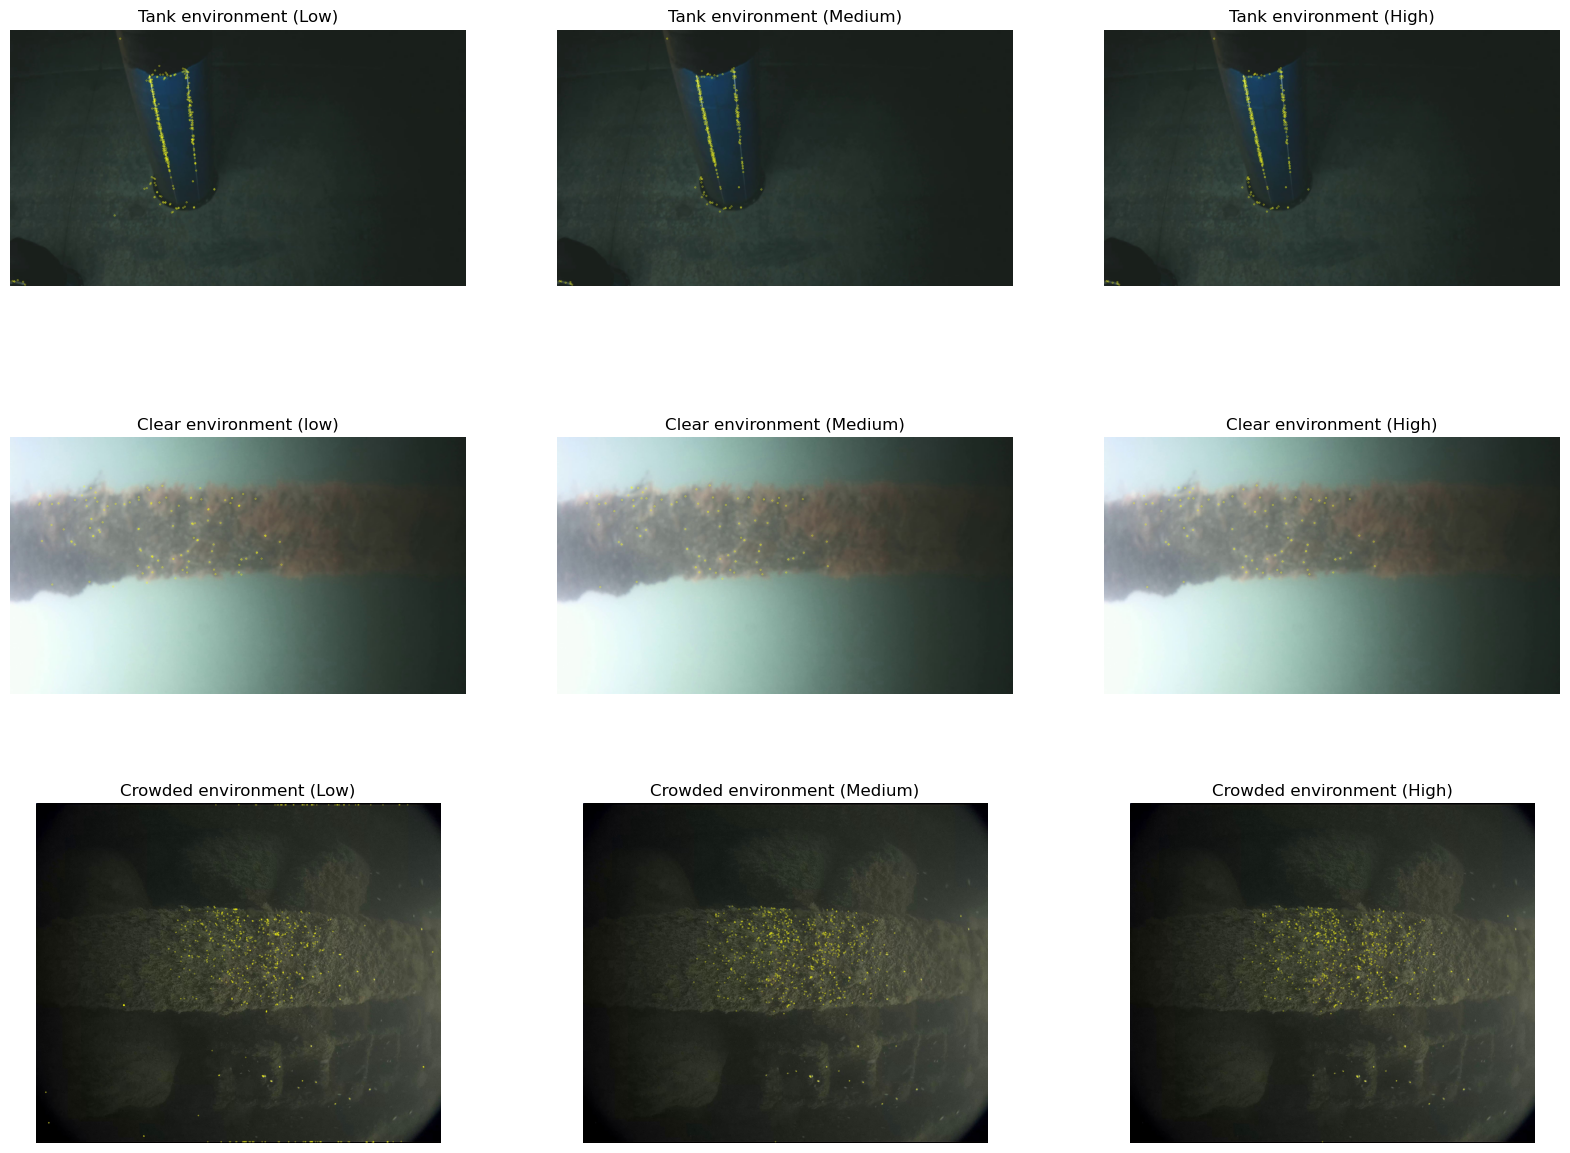

In [11]:
import cv2 
from matplotlib import pyplot as plt 

# figure 
image_figure = plt.figure(figsize=(20, 15))
rows = 3
columns = 3

# get images
tank_low = cv2.imread('../Data/feature_images/sigma_low_frame_normal_tank_16.jpg',cv2.IMREAD_UNCHANGED)
tank_low = cv2.cvtColor(tank_low, cv2.COLOR_BGR2RGB)
tank_medium = cv2.imread('../Data/feature_images/sigma_medium_frame_normal_tank_16.jpg',cv2.IMREAD_UNCHANGED)
tank_medium = cv2.cvtColor(tank_medium, cv2.COLOR_BGR2RGB)
tank_high = cv2.imread('../Data/feature_images/sigma_high_frame_normal_tank_16.jpg',cv2.IMREAD_UNCHANGED)
tank_high = cv2.cvtColor(tank_high, cv2.COLOR_BGR2RGB)

clear_low = cv2.imread('../Data/feature_images/sigma_low_frame_normal_clear_12.jpg',cv2.IMREAD_UNCHANGED)
clear_low = cv2.cvtColor(clear_low, cv2.COLOR_BGR2RGB)
clear_medium = cv2.imread('../Data/feature_images/sigma_medium_frame_normal_clear_12.jpg',cv2.IMREAD_UNCHANGED)
clear_medium = cv2.cvtColor(clear_medium, cv2.COLOR_BGR2RGB)
clear_high = cv2.imread('../Data/feature_images/sigma_high_frame_normal_clear_12.jpg',cv2.IMREAD_UNCHANGED)
clear_high = cv2.cvtColor(clear_high, cv2.COLOR_BGR2RGB)

crowded_low = cv2.imread('../Data/feature_images/sigma_low_frame_normal_crowded_3.jpg',cv2.IMREAD_UNCHANGED)
crowded_low = cv2.cvtColor(crowded_low, cv2.COLOR_BGR2RGB)
crowded_medium = cv2.imread('../Data/feature_images/sigma_medium_frame_normal_crowded_3.jpg',cv2.IMREAD_UNCHANGED)
crowded_medium = cv2.cvtColor(crowded_medium, cv2.COLOR_BGR2RGB)
crowded_high = cv2.imread('../Data/feature_images/sigma_high_frame_normal_crowded_3.jpg',cv2.IMREAD_UNCHANGED)
crowded_high = cv2.cvtColor(crowded_high, cv2.COLOR_BGR2RGB)

# add images to figure
image_figure.add_subplot(rows, columns, 1)
plt.imshow(tank_low) 
plt.axis('off') 
plt.title("Tank environment (Low)") 

image_figure.add_subplot(rows, columns, 2)
plt.imshow(tank_medium) 
plt.axis('off') 
plt.title("Tank environment (Medium)")

image_figure.add_subplot(rows, columns, 3)
plt.imshow(tank_high) 
plt.axis('off') 
plt.title("Tank environment (High)")

image_figure.add_subplot(rows, columns, 4)
plt.imshow(clear_low) 
plt.axis('off') 
plt.title("Clear environment (low)")

image_figure.add_subplot(rows, columns, 5)
plt.imshow(clear_medium) 
plt.axis('off') 
plt.title("Clear environment (Medium)")

image_figure.add_subplot(rows, columns, 6)
plt.imshow(clear_high) 
plt.axis('off') 
plt.title("Clear environment (High)")

image_figure.add_subplot(rows, columns, 7)
plt.imshow(crowded_low) 
plt.axis('off') 
plt.title("Crowded environment (Low)")

image_figure.add_subplot(rows, columns, 8)
plt.imshow(crowded_medium) 
plt.axis('off') 
plt.title("Crowded environment (Medium)")

image_figure.add_subplot(rows, columns, 9)
plt.imshow(crowded_high) 
plt.axis('off') 
plt.title("Crowded environment (High)")


Here we see the influence of sigma. In the tank environment low sigma results in more features where pillars are connected to other objects. These are counted as valid but many of them are not needed for identification. In terms of the clear environment a couple of features disapear from the pillar, but nothing significant. In the crowded environment low sigma results in the edge of the image being seen as pillars, which is undesirable. For these reasons the value of sigma is kept at 1.6.

## Precise upscaling

Precise upscaling is used to prevent localisation bias at the cost of processing time. The effects on this specific scenario will be analysed. <br>

The remaining variable where kept constant at the following values: <br>
Edge threshold: 43 <br>
Contrast threshold: 0.02 <br>
Layers: 3 <br>
Sigma: 1.6 <br>

In [18]:
import csv

# Paths
paths_clear = []
paths_crowded = []
paths_tank = []

# Other variables
number_of_tests = 2
upscale = ["True","False"]
# Get all file paths
for i in range(number_of_tests):
    path_clear = '../Data/Sift/Clear_Dataset/upscale_test_'+ str(i) +'_results.csv'
    path_crowded = '../Data/Sift/Crowded_Dataset/upscale_test_'+ str(i) +'_results.csv'
    path_tank = '../Data/Sift/Tank_Dataset/upscale_test_'+ str(i) +'_results.csv'
    paths_clear.append(path_clear)
    paths_crowded.append(path_crowded)
    paths_tank.append(path_tank)

# Extract desired information
all_feature_counts_clear, all_percentages_clear, all_time_counts_clear = read_segmentation_results(paths_clear)
all_feature_counts_crowded, all_percentages_crowded, all_time_counts_crowded = read_segmentation_results(paths_crowded)
all_feature_counts_tank, all_percentages_tank, all_time_counts_tank = read_segmentation_results(paths_tank)

In [19]:
from tabulate import tabulate, SEPARATING_LINE
# remove -1 elements as it is the representation of N/A and count valid samples
valid_samples_percentages_clear = []
valid_samples_percentages_crowded = []
valid_samples_percentages_tank = []

all_percentages_clear_clean = []
all_percentages_crowded_clean = []
all_percentages_tank_clean = []

for i in range(len(all_percentages_clear)):
    clean_temp = clean_data(all_percentages_clear[i])
    all_percentages_clear_clean.append(clean_temp)
    valid_samples_percentages_clear.append(len(all_percentages_clear_clean[i]))
    
for i in range(len(all_percentages_crowded)):
    clean_temp = clean_data(all_percentages_crowded[i])
    all_percentages_crowded_clean.append(clean_temp)
    valid_samples_percentages_crowded.append(len(all_percentages_crowded_clean[i]))

for i in range(len(all_percentages_tank)):
    clean_temp = clean_data(all_percentages_tank[i])
    all_percentages_tank_clean.append(clean_temp)
    valid_samples_percentages_tank.append(len(all_percentages_tank_clean[i]))

# Create headers
headers = ["precise upscale","valid samples", "total samples", "percentage valid"]

# Prepare table data
table_data = [[],[],[]]
enviroments = ["Clear", "Crowded", "Tank"]
valid_environments = [valid_samples_percentages_clear, valid_samples_percentages_crowded, valid_samples_percentages_tank]
complete_environments = [all_percentages_clear,all_percentages_crowded,all_percentages_tank]
for i in range(len(enviroments)):
    row = []
    for j in range(len(upscale)):
        row = [upscale[j],valid_environments[i][j],len(complete_environments[i][j]),(valid_environments[i][j]/len(complete_environments[i][j]))*100.0]
        table_data[i].append(row)

#display table
for i in range(len(enviroments)):
    print(enviroments[i]+":")
    print(tabulate(table_data[i], headers=headers,tablefmt="heavy_grid", numalign="right", floatfmt=".2f"))

Clear:
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ precise upscale   ┃   valid samples ┃   total samples ┃   percentage valid ┃
┣━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ True              ┃             150 ┃             150 ┃             100.00 ┃
┣━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ False             ┃             150 ┃             150 ┃             100.00 ┃
┗━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━┛
Crowded:
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ precise upscale   ┃   valid samples ┃   total samples ┃   percentage valid ┃
┣━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ True              ┃             200 ┃             200 ┃             100.00 ┃
┣━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ False             ┃             20

Precise upscaling is seen to have no effect on the number of valid samples.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 

# Find medians and quantiles
medians = []
percentiles_25 = []
percentiles_75 = []

feature_environments = [all_feature_counts_clear,all_feature_counts_crowded,all_feature_counts_tank]
time_environments = [all_time_counts_clear,all_time_counts_crowded,all_time_counts_tank]
percentage_environments = [all_percentages_clear_clean,all_percentages_crowded_clean,all_percentages_tank_clean]

for i in range(len(enviroments)):
    feature_medians = []
    feature_percentiles_25 = []
    feature_percentiles_75 = []
    time_medians = []
    time_percentiles_25 = []
    time_percentiles_75 = []
    percentage_medians = []
    percentage_percentiles_25 = []
    percentage_percentiles_75 = []
    
    for j in range(number_of_tests):
        feature_medians.append(statistics.median(feature_environments[i][j]))
        feature_percentiles_25.append(np.percentile(feature_environments[i][j], 25))
        feature_percentiles_75.append(np.percentile(feature_environments[i][j], 75))
        
        time_medians.append(statistics.median(time_environments[i][j]))
        time_percentiles_25.append(np.percentile(time_environments[i][j], 25))
        time_percentiles_75.append(np.percentile(time_environments[i][j], 75))
        
        percentage_medians.append(statistics.median(percentage_environments[i][j]))
        percentage_percentiles_25.append(np.percentile(percentage_environments[i][j], 25))
        percentage_percentiles_75.append(np.percentile(percentage_environments[i][j], 75))

    medians.append([feature_medians,time_medians,percentage_medians])
    percentiles_25.append([feature_percentiles_25,time_percentiles_25,percentage_percentiles_25])
    percentiles_75.append([feature_percentiles_75,time_percentiles_75,percentage_percentiles_75])

# Data structure: environment -> test category -> sigma setting

# Number of features is plotted
plt.plot(upscale,medians[0][0],marker='.',color='b',label="Clear")
plt.fill_between(upscale, percentiles_25[0][0],percentiles_75[0][0], alpha=0.2)

plt.plot(upscale,medians[1][0],marker='.',color='r',label="Crowded")
plt.fill_between(upscale, percentiles_25[1][0],percentiles_75[1][0], alpha=0.2)

plt.plot(upscale,medians[2][0],marker='.',color='g',label="Tank")
plt.fill_between(upscale, percentiles_25[2][0],percentiles_75[2][0], alpha=0.2)

plt.xlabel('Precise upscaling')
plt.ylabel('Features found (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of features found')
plt.legend()
plt.savefig("upscale_feature_graph.jpg")
plt.show()


# Time taken is plotted
plt.plot(upscale,medians[0][1],marker='.',color='b',label="Clear")
plt.fill_between(upscale, percentiles_25[0][1],percentiles_75[0][1], alpha=0.2)

plt.plot(upscale,medians[1][1],marker='.',color='r',label="Crowded")
plt.fill_between(upscale, percentiles_25[1][1],percentiles_75[1][1], alpha=0.2)

plt.plot(upscale,medians[2][1],marker='.',color='g',label="Tank")
plt.fill_between(upscale, percentiles_25[2][1],percentiles_75[2][1], alpha=0.2)

plt.xlabel('Precise upscaling')
plt.ylabel('Time taken [ms] (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of time taken')
plt.legend()
plt.savefig("upscale_time_graph.jpg")
plt.show()

# Percentage is plotted
plt.plot(upscale,medians[0][2],marker='.',color='b',label="Clear")
plt.fill_between(upscale, percentiles_25[0][2],percentiles_75[0][2], alpha=0.2)

plt.plot(upscale,medians[1][2],marker='.',color='r',label="Crowded")
plt.fill_between(upscale, percentiles_25[1][2],percentiles_75[1][2], alpha=0.2)

plt.plot(upscale,medians[2][2],marker='.',color='g',label="Tank")
plt.fill_between(upscale, percentiles_25[2][2],percentiles_75[2][2], alpha=0.2)

plt.xlabel('Precise upscaling')
plt.ylabel('Percentage (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of percentage of features withing segmentation')
plt.legend()
plt.savefig("upscale_percentage_graph.jpg")
plt.show()

# Find sigma with best median value
final_sum = 0
final_upscale = 0
for j in range(number_of_tests):
        median_sum = medians[0][2][j]+medians[1][2][j]+medians[2][2][j]
        if median_sum > final_sum:
            final_sum = median_sum
            final_upscale = upscale[j]
print("The best median performance is with precise upscaling: " + str(final_upscale) + " with a percentage sum of " + str(final_sum))

NameError: name 'upscale' is not defined

Very little change happens between having precise upscaling enabled or disabled. Having it disabled will slightly increase processing time and increase success rate in the tank environment, while lowering it for the crowded environment. Since almost no change occur it will be kept disabled. 

The final settings are thus: <br>
Edge threshold: 43 <br>
Contrast threshold: 0.03 <br>
Layers: 3 <br>
Sigma: 1.6 <br>
With precise upscaling disabled.<br>

## ORB test:

The second feature detector tested is ORB. All the parameters are tested in terms of number of features found, number of features that match the segmented image as well as the time it takes to find the features. During testing only the 1000 best features where kept, due to the fact that too many features would make everything slower as well as make it harder to detect any specific shape amongst them.

### Scale factor:

The scale factor represents the decimation ratio. It has a value above one and below 2. <br>

The remaining variable where kept constant at the following values: <br>
Levels: 8<br>
Edge threshold: 31<br>
Start level: 0<br>
Points in element: 2<br>
Patch size: 31<br>
Fast threshold: 20<br>

In [8]:
import csv

# Paths
paths_clear = []
paths_crowded = []
paths_tank = []

# Other variables
number_of_tests = 9
scale = []
current_scale = 1.1
for i in range(number_of_tests):
    scale.append(current_scale)
    current_scale = current_scale+0.1
    
# Get all file paths
for i in range(number_of_tests):
    path_clear = '../Data/Orb/Clear_Dataset/scale_'+ str(i) +'_results.csv'
    path_crowded = '../Data/Orb/Crowded_Dataset/scale_'+ str(i) +'_results.csv'
    path_tank = '../Data/Orb/Tank_Dataset/scale_'+ str(i) +'_results.csv'
    paths_clear.append(path_clear)
    paths_crowded.append(path_crowded)
    paths_tank.append(path_tank)

# Extract desired information
all_feature_counts_clear, all_percentages_clear, all_time_counts_clear = read_segmentation_results(paths_clear)
all_feature_counts_crowded, all_percentages_crowded, all_time_counts_crowded = read_segmentation_results(paths_crowded)
all_feature_counts_tank, all_percentages_tank, all_time_counts_tank = read_segmentation_results(paths_tank)

In [9]:
from tabulate import tabulate, SEPARATING_LINE
# remove -1 elements as it is the representation of N/A and count valid samples
valid_samples_percentages_clear = []
valid_samples_percentages_crowded = []
valid_samples_percentages_tank = []

all_percentages_clear_clean = []
all_percentages_crowded_clean = []
all_percentages_tank_clean = []

for i in range(len(all_percentages_clear)):
    clean_temp = clean_data(all_percentages_clear[i])
    all_percentages_clear_clean.append(clean_temp)
    valid_samples_percentages_clear.append(len(all_percentages_clear_clean[i]))
    
for i in range(len(all_percentages_crowded)):
    clean_temp = clean_data(all_percentages_crowded[i])
    all_percentages_crowded_clean.append(clean_temp)
    valid_samples_percentages_crowded.append(len(all_percentages_crowded_clean[i]))

for i in range(len(all_percentages_tank)):
    clean_temp = clean_data(all_percentages_tank[i])
    all_percentages_tank_clean.append(clean_temp)
    valid_samples_percentages_tank.append(len(all_percentages_tank_clean[i]))

# Create headers
headers = ["Scale factor","valid samples", "total samples", "percentage valid"]

# Prepare table data
table_data = [[],[],[]]
enviroments = ["Clear", "Crowded", "Tank"]
valid_environments = [valid_samples_percentages_clear, valid_samples_percentages_crowded, valid_samples_percentages_tank]
complete_environments = [all_percentages_clear,all_percentages_crowded,all_percentages_tank]
for i in range(len(enviroments)):
    row = []
    for j in range(len(scale)):
        row = [scale[j],valid_environments[i][j],len(complete_environments[i][j]),(valid_environments[i][j]/len(complete_environments[i][j]))*100.0]
        table_data[i].append(row)

#display table
for i in range(len(enviroments)):
    print(enviroments[i]+":")
    print(tabulate(table_data[i], headers=headers,tablefmt="heavy_grid", numalign="right", floatfmt=".2f"))

Clear:
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃   Scale factor ┃   valid samples ┃   total samples ┃   percentage valid ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃           1.10 ┃              83 ┃             150 ┃              55.33 ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃           1.20 ┃             108 ┃             150 ┃              72.00 ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃           1.30 ┃             114 ┃             150 ┃              76.00 ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃           1.40 ┃             120 ┃             150 ┃              80.00 ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃           1.50 ┃             121 ┃             150 ┃              80.67 ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃    

Alot of data is lost in the clear environment at low scale factors, indicating that a scale factor above 1.4 should be used.

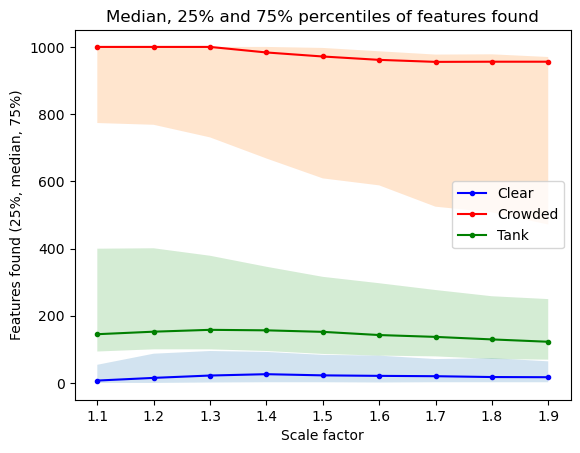

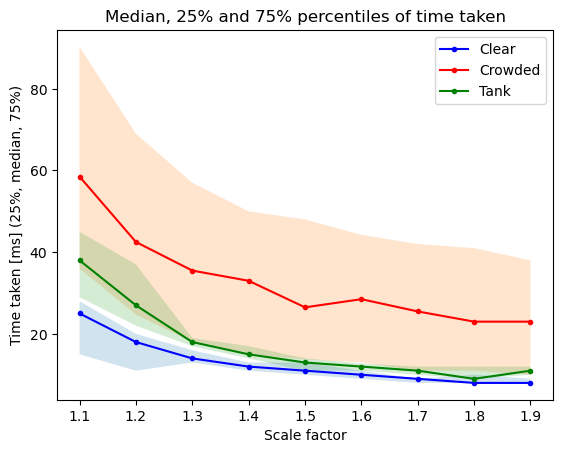

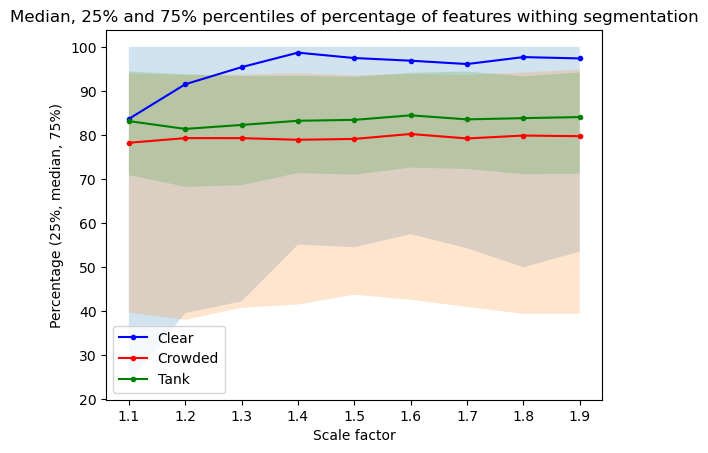

The best median performance is with precise upscaling: 1.6000000000000005 with a percentage sum of 261.5929


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 

# Find medians and quantiles
medians = []
percentiles_25 = []
percentiles_75 = []

feature_environments = [all_feature_counts_clear,all_feature_counts_crowded,all_feature_counts_tank]
time_environments = [all_time_counts_clear,all_time_counts_crowded,all_time_counts_tank]
percentage_environments = [all_percentages_clear_clean,all_percentages_crowded_clean,all_percentages_tank_clean]

for i in range(len(enviroments)):
    feature_medians = []
    feature_percentiles_25 = []
    feature_percentiles_75 = []
    time_medians = []
    time_percentiles_25 = []
    time_percentiles_75 = []
    percentage_medians = []
    percentage_percentiles_25 = []
    percentage_percentiles_75 = []
    
    for j in range(number_of_tests):
        feature_medians.append(statistics.median(feature_environments[i][j]))
        feature_percentiles_25.append(np.percentile(feature_environments[i][j], 25))
        feature_percentiles_75.append(np.percentile(feature_environments[i][j], 75))
        
        time_medians.append(statistics.median(time_environments[i][j]))
        time_percentiles_25.append(np.percentile(time_environments[i][j], 25))
        time_percentiles_75.append(np.percentile(time_environments[i][j], 75))
        
        percentage_medians.append(statistics.median(percentage_environments[i][j]))
        percentage_percentiles_25.append(np.percentile(percentage_environments[i][j], 25))
        percentage_percentiles_75.append(np.percentile(percentage_environments[i][j], 75))

    medians.append([feature_medians,time_medians,percentage_medians])
    percentiles_25.append([feature_percentiles_25,time_percentiles_25,percentage_percentiles_25])
    percentiles_75.append([feature_percentiles_75,time_percentiles_75,percentage_percentiles_75])

# Data structure: environment -> test category -> sigma setting

# Number of features is plotted
plt.plot(scale,medians[0][0],marker='.',color='b',label="Clear")
plt.fill_between(scale, percentiles_25[0][0],percentiles_75[0][0], alpha=0.2)

plt.plot(scale,medians[1][0],marker='.',color='r',label="Crowded")
plt.fill_between(scale, percentiles_25[1][0],percentiles_75[1][0], alpha=0.2)

plt.plot(scale,medians[2][0],marker='.',color='g',label="Tank")
plt.fill_between(scale, percentiles_25[2][0],percentiles_75[2][0], alpha=0.2)

plt.xlabel('Scale factor')
plt.ylabel('Features found (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of features found')
plt.legend()
plt.savefig("scale_factor_feature_graph.jpg")
plt.show()


# Time taken is plotted
plt.plot(scale,medians[0][1],marker='.',color='b',label="Clear")
plt.fill_between(scale, percentiles_25[0][1],percentiles_75[0][1], alpha=0.2)

plt.plot(scale,medians[1][1],marker='.',color='r',label="Crowded")
plt.fill_between(scale, percentiles_25[1][1],percentiles_75[1][1], alpha=0.2)

plt.plot(scale,medians[2][1],marker='.',color='g',label="Tank")
plt.fill_between(scale, percentiles_25[2][1],percentiles_75[2][1], alpha=0.2)

plt.xlabel('Scale factor')
plt.ylabel('Time taken [ms] (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of time taken')
plt.legend()
plt.savefig("scale_factor_time_graph.jpg")
plt.show()

# Percentage is plotted
plt.plot(scale,medians[0][2],marker='.',color='b',label="Clear")
plt.fill_between(scale, percentiles_25[0][2],percentiles_75[0][2], alpha=0.2)

plt.plot(scale,medians[1][2],marker='.',color='r',label="Crowded")
plt.fill_between(scale, percentiles_25[1][2],percentiles_75[1][2], alpha=0.2)

plt.plot(scale,medians[2][2],marker='.',color='g',label="Tank")
plt.fill_between(scale, percentiles_25[2][2],percentiles_75[2][2], alpha=0.2)

plt.xlabel('Scale factor')
plt.ylabel('Percentage (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of percentage of features withing segmentation')
plt.legend()
plt.savefig("scale_factor_percentage_graph.jpg")
plt.show()

# Find sigma with best median value
final_sum = 0
final_scale = 0
for j in range(number_of_tests):
        median_sum = medians[0][2][j]+medians[1][2][j]+medians[2][2][j]
        if median_sum > final_sum:
            final_sum = median_sum
            final_scale = scale[j]
print("The best median performance is with precise upscaling: " + str(final_scale) + " with a percentage sum of " + str(final_sum))

In terms of features found, the scale factor seem to have little influence. The deviation of both the clear and tank environments shrink with the increase in scale factor, while the devation of the crowded environment increases. Scale factors bellow 1.3 also present a big issue in terms of too few features being found in clear environments. <br>

In terms of time, increasing the scale factor, decreases the time needed for all environments. The biggest influence is going from 1.1 to 1.3. <br>

The percentage match also acts quite stabaly, with the clear environment increasing up to a scale factor of 1.4, whereafter it stabalises a bit. The other environments are quite stable from the get go. This indicates that the scale factor should have a value of 1.4 or above. Since the median percentage sum is biggest at 1.6, that is the value that will be used. This is higher than the standard value of 1.2. <br>

Images of a scale factor of 1.2 will now be compared to 1.6. <br>

Text(0.5, 1.0, 'Tank environment (1.2 scale factor)')

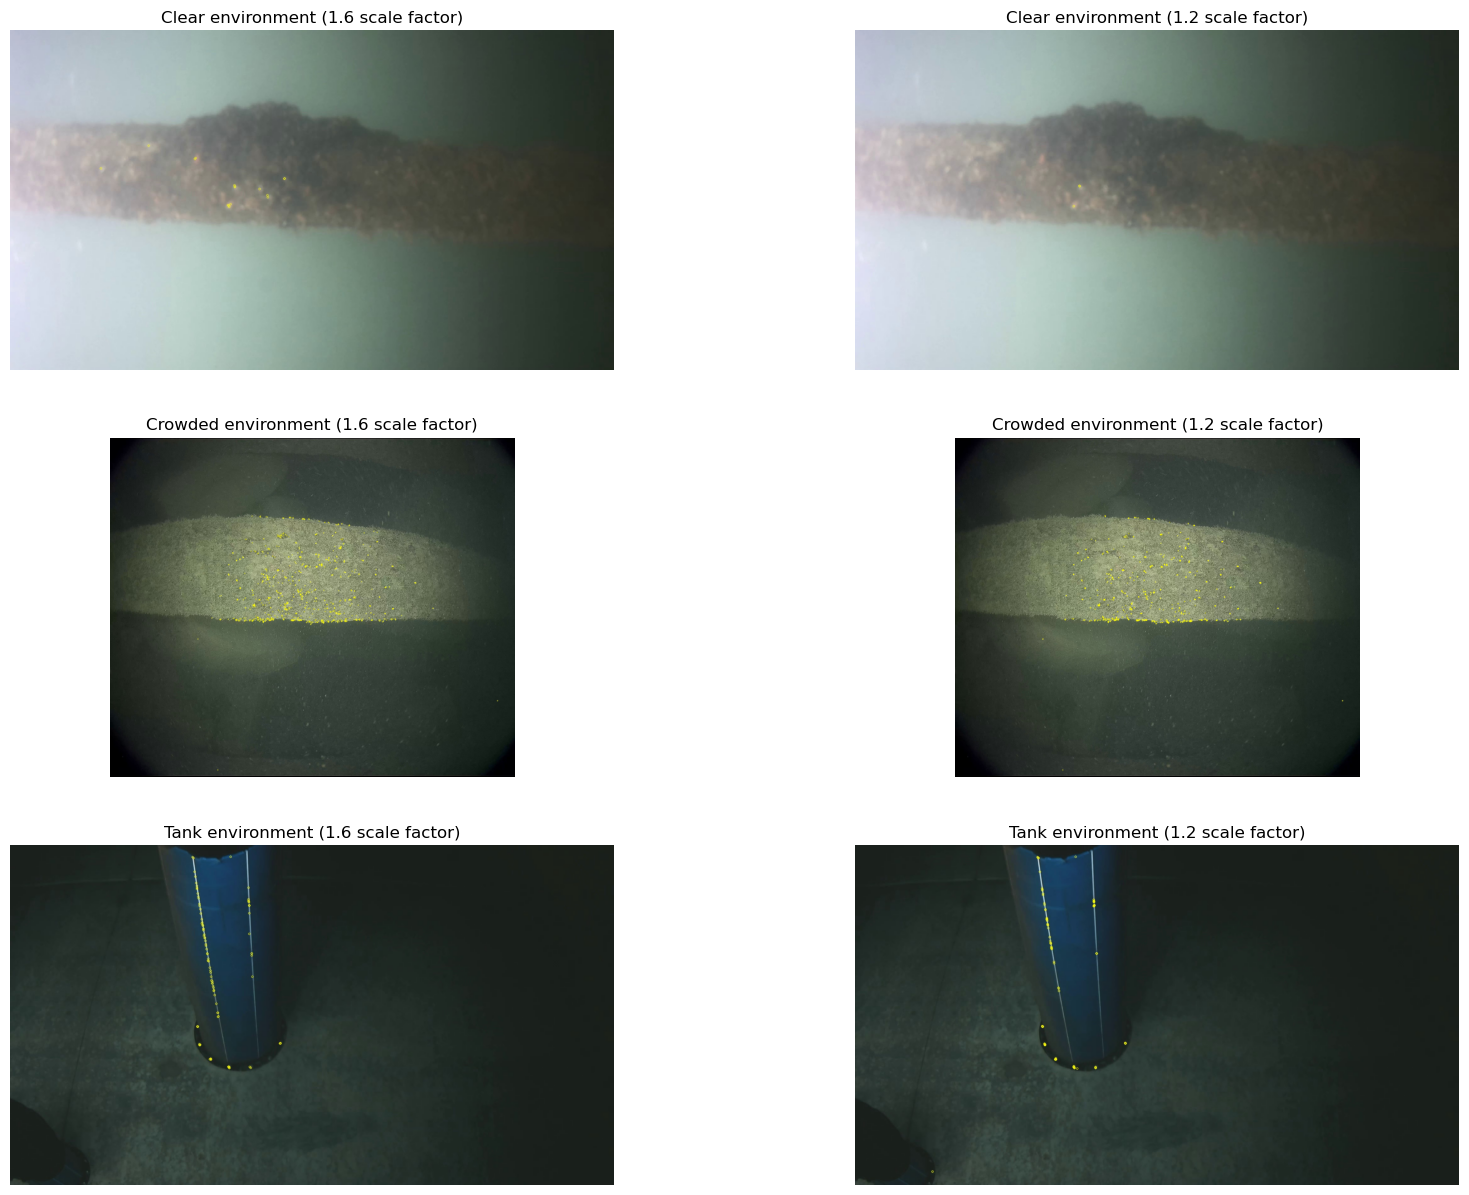

In [16]:
import cv2 
from matplotlib import pyplot as plt 

# figure 
image_figure = plt.figure(figsize=(20, 15))
rows = 3
columns = 2

# get images
clear_bad = cv2.imread('../Data/Orb/Images/scale_low_frame_normal_clear_5.jpg',cv2.IMREAD_UNCHANGED)
clear_bad = cv2.cvtColor(clear_bad, cv2.COLOR_BGR2RGB)
clear_good = cv2.imread('../Data/Orb/Images/scale_high_frame_normal_clear_5.jpg',cv2.IMREAD_UNCHANGED) 
clear_good = cv2.cvtColor(clear_good, cv2.COLOR_BGR2RGB)

crowded_bad = cv2.imread('../Data/Orb/Images/scale_low_frame_normal_crowded_23.jpg',cv2.IMREAD_UNCHANGED)
crowded_bad = cv2.cvtColor(crowded_bad, cv2.COLOR_BGR2RGB)
crowded_good = cv2.imread('../Data/Orb/Images/scale_high_frame_normal_crowded_23.jpg',cv2.IMREAD_UNCHANGED)
crowded_good = cv2.cvtColor(crowded_good, cv2.COLOR_BGR2RGB)

tank_bad = cv2.imread('../Data/Orb/Images/scale_low_frame_normal_tank_14.jpg',cv2.IMREAD_UNCHANGED)
tank_bad = cv2.cvtColor(tank_bad, cv2.COLOR_BGR2RGB)
tank_good = cv2.imread('../Data/Orb/Images/scale_high_frame_normal_tank_14.jpg',cv2.IMREAD_UNCHANGED)
tank_good = cv2.cvtColor(tank_good, cv2.COLOR_BGR2RGB)

# add images to figure
image_figure.add_subplot(rows, columns, 1)
plt.imshow(clear_good) 
plt.axis('off') 
plt.title("Clear environment (1.6 scale factor)") 

image_figure.add_subplot(rows, columns, 2)
plt.imshow(clear_bad) 
plt.axis('off') 
plt.title("Clear environment (1.2 scale factor)")

image_figure.add_subplot(rows, columns, 3)
plt.imshow(crowded_good) 
plt.axis('off') 
plt.title("Crowded environment (1.6 scale factor)") 

image_figure.add_subplot(rows, columns, 4)
plt.imshow(crowded_bad) 
plt.axis('off') 
plt.title("Crowded environment (1.2 scale factor)")

image_figure.add_subplot(rows, columns, 5)
plt.imshow(tank_good) 
plt.axis('off') 
plt.title("Tank environment (1.6 scale factor)")

image_figure.add_subplot(rows, columns, 6)
plt.imshow(tank_bad) 
plt.axis('off') 
plt.title("Tank environment (1.2 scale factor)") 


From these images it is seen that many features disapear in the clear environment, when lowering the scale factor, while little change is seen in the crowded environment. The tank environment also seem to lose some features, but since many are present to start with the removal of some is less critical. The increase in scale factor also dont seem to add "false" features, which means that a scale factor of 1.6 is viable.

### Levels:

The number of levels used will also be tested in an area around the standard value of 8 <br>

The remaining variable where kept constant at the following values: <br>
Scale factor: 1.6<br>
Edge threshold: 31<br>
Start level: 0<br>
Points in element: 2<br>
Patch size: 31<br>
Fast threshold: 20<br>

In [26]:
import csv

# Paths
paths_clear = []
paths_crowded = []
paths_tank = []

# Other variables
number_of_tests = 17
level = []
current_level = 1
for i in range(number_of_tests):
    level.append(current_level)
    current_level = current_level+1
    
# Get all file paths
for i in range(number_of_tests):
    path_clear = '../Data/Orb/Clear_Dataset/level_'+ str(i) +'_results.csv'
    path_crowded = '../Data/Orb/Crowded_Dataset/level_'+ str(i) +'_results.csv'
    path_tank = '../Data/Orb/Tank_Dataset/level_'+ str(i) +'_results.csv'
    paths_clear.append(path_clear)
    paths_crowded.append(path_crowded)
    paths_tank.append(path_tank)

# Extract desired information
all_feature_counts_clear, all_percentages_clear, all_time_counts_clear = read_segmentation_results(paths_clear)
all_feature_counts_crowded, all_percentages_crowded, all_time_counts_crowded = read_segmentation_results(paths_crowded)
all_feature_counts_tank, all_percentages_tank, all_time_counts_tank = read_segmentation_results(paths_tank)

In [27]:
from tabulate import tabulate, SEPARATING_LINE
# remove -1 elements as it is the representation of N/A and count valid samples
valid_samples_percentages_clear = []
valid_samples_percentages_crowded = []
valid_samples_percentages_tank = []

all_percentages_clear_clean = []
all_percentages_crowded_clean = []
all_percentages_tank_clean = []

for i in range(len(all_percentages_clear)):
    clean_temp = clean_data(all_percentages_clear[i])
    all_percentages_clear_clean.append(clean_temp)
    valid_samples_percentages_clear.append(len(all_percentages_clear_clean[i]))
    
for i in range(len(all_percentages_crowded)):
    clean_temp = clean_data(all_percentages_crowded[i])
    all_percentages_crowded_clean.append(clean_temp)
    valid_samples_percentages_crowded.append(len(all_percentages_crowded_clean[i]))

for i in range(len(all_percentages_tank)):
    clean_temp = clean_data(all_percentages_tank[i])
    all_percentages_tank_clean.append(clean_temp)
    valid_samples_percentages_tank.append(len(all_percentages_tank_clean[i]))

# Create headers
headers = ["Levels","valid samples", "total samples", "percentage valid"]

# Prepare table data
table_data = [[],[],[]]
enviroments = ["Clear", "Crowded", "Tank"]
valid_environments = [valid_samples_percentages_clear, valid_samples_percentages_crowded, valid_samples_percentages_tank]
complete_environments = [all_percentages_clear,all_percentages_crowded,all_percentages_tank]
for i in range(len(enviroments)):
    row = []
    for j in range(len(level)):
        row = [level[j],valid_environments[i][j],len(complete_environments[i][j]),(valid_environments[i][j]/len(complete_environments[i][j]))*100.0]
        table_data[i].append(row)

#display table
for i in range(len(enviroments)):
    print(enviroments[i]+":")
    print(tabulate(table_data[i], headers=headers,tablefmt="heavy_grid", numalign="right", floatfmt=".2f"))

Clear:
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃   Levels ┃   valid samples ┃   total samples ┃   percentage valid ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        1 ┃              76 ┃             150 ┃              50.67 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        2 ┃              89 ┃             150 ┃              59.33 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        3 ┃             102 ┃             150 ┃              68.00 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        4 ┃             113 ┃             150 ┃              75.33 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        5 ┃             121 ┃             150 ┃              80.67 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃        6 ┃             123 ┃             150 ┃              82.00 ┃
┣━━━━━━━━━━╋━

Any number of layers below six will decrease the number of valid samples. Increasing it will not improve the number of valid samples.

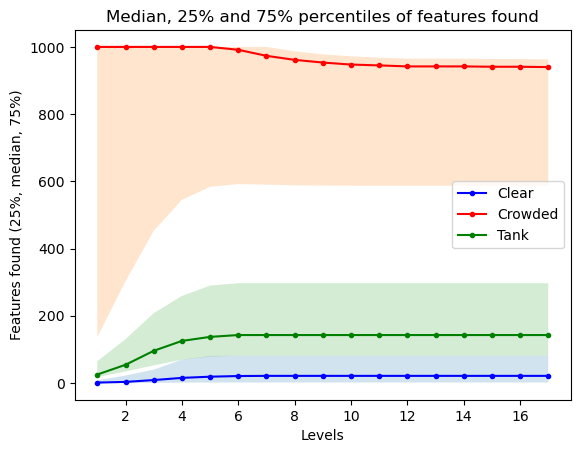

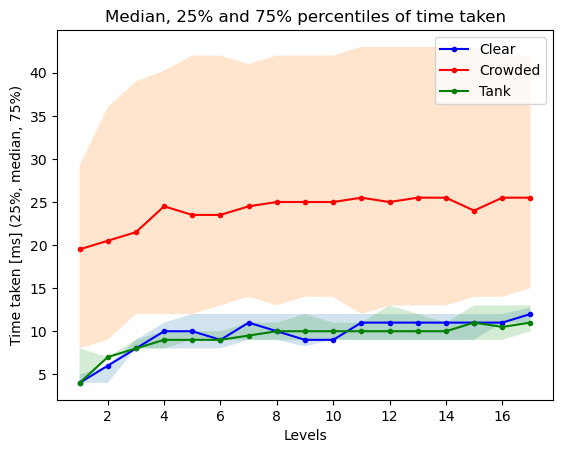

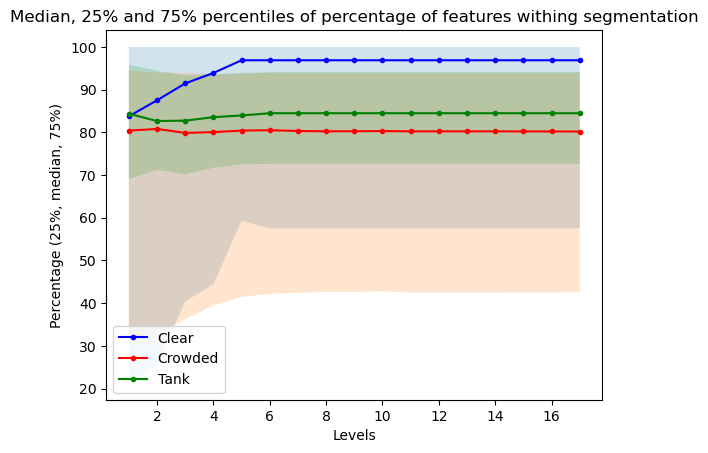

The best median performance is with levels: 6 with a percentage sum of 261.84965


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 

# Find medians and quantiles
medians = []
percentiles_25 = []
percentiles_75 = []

feature_environments = [all_feature_counts_clear,all_feature_counts_crowded,all_feature_counts_tank]
time_environments = [all_time_counts_clear,all_time_counts_crowded,all_time_counts_tank]
percentage_environments = [all_percentages_clear_clean,all_percentages_crowded_clean,all_percentages_tank_clean]

for i in range(len(enviroments)):
    feature_medians = []
    feature_percentiles_25 = []
    feature_percentiles_75 = []
    time_medians = []
    time_percentiles_25 = []
    time_percentiles_75 = []
    percentage_medians = []
    percentage_percentiles_25 = []
    percentage_percentiles_75 = []
    
    for j in range(number_of_tests):
        feature_medians.append(statistics.median(feature_environments[i][j]))
        feature_percentiles_25.append(np.percentile(feature_environments[i][j], 25))
        feature_percentiles_75.append(np.percentile(feature_environments[i][j], 75))
        
        time_medians.append(statistics.median(time_environments[i][j]))
        time_percentiles_25.append(np.percentile(time_environments[i][j], 25))
        time_percentiles_75.append(np.percentile(time_environments[i][j], 75))
        
        percentage_medians.append(statistics.median(percentage_environments[i][j]))
        percentage_percentiles_25.append(np.percentile(percentage_environments[i][j], 25))
        percentage_percentiles_75.append(np.percentile(percentage_environments[i][j], 75))

    medians.append([feature_medians,time_medians,percentage_medians])
    percentiles_25.append([feature_percentiles_25,time_percentiles_25,percentage_percentiles_25])
    percentiles_75.append([feature_percentiles_75,time_percentiles_75,percentage_percentiles_75])

# Data structure: environment -> test category -> sigma setting

# Number of features is plotted
plt.plot(level,medians[0][0],marker='.',color='b',label="Clear")
plt.fill_between(level, percentiles_25[0][0],percentiles_75[0][0], alpha=0.2)

plt.plot(level,medians[1][0],marker='.',color='r',label="Crowded")
plt.fill_between(level, percentiles_25[1][0],percentiles_75[1][0], alpha=0.2)

plt.plot(level,medians[2][0],marker='.',color='g',label="Tank")
plt.fill_between(level, percentiles_25[2][0],percentiles_75[2][0], alpha=0.2)

plt.xlabel('Levels')
plt.ylabel('Features found (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of features found')
plt.legend()
plt.savefig("orb_level_feature_graph.jpg")
plt.show()


# Time taken is plotted
plt.plot(level,medians[0][1],marker='.',color='b',label="Clear")
plt.fill_between(level, percentiles_25[0][1],percentiles_75[0][1], alpha=0.2)

plt.plot(level,medians[1][1],marker='.',color='r',label="Crowded")
plt.fill_between(level, percentiles_25[1][1],percentiles_75[1][1], alpha=0.2)

plt.plot(level,medians[2][1],marker='.',color='g',label="Tank")
plt.fill_between(level, percentiles_25[2][1],percentiles_75[2][1], alpha=0.2)

plt.xlabel('Levels')
plt.ylabel('Time taken [ms] (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of time taken')
plt.legend()
plt.savefig("orb_level_factor_time_graph.jpg")
plt.show()

# Percentage is plotted
plt.plot(level,medians[0][2],marker='.',color='b',label="Clear")
plt.fill_between(level, percentiles_25[0][2],percentiles_75[0][2], alpha=0.2)

plt.plot(level,medians[1][2],marker='.',color='r',label="Crowded")
plt.fill_between(level, percentiles_25[1][2],percentiles_75[1][2], alpha=0.2)

plt.plot(level,medians[2][2],marker='.',color='g',label="Tank")
plt.fill_between(level, percentiles_25[2][2],percentiles_75[2][2], alpha=0.2)

plt.xlabel('Levels')
plt.ylabel('Percentage (25%, median, 75%)')
plt.title('Median, 25% and 75% percentiles of percentage of features withing segmentation')
plt.legend()
plt.savefig("orb_level_factor_percentage_graph.jpg")
plt.show()

# Find sigma with best median value
final_sum = 0
final_level = 0
for j in range(number_of_tests):
        median_sum = medians[0][2][j]+medians[1][2][j]+medians[2][2][j]
        if median_sum > final_sum:
            final_sum = median_sum
            final_level = level[j]
print("The best median performance is with levels: " + str(final_level) + " with a percentage sum of " + str(final_sum))

It seems that increasing the number of levels beyond 6 will have in major effect on performance. It will only decrease the number of features in the crowded environments slightly, while increasing the processing time sligthly for all environments. It would be interesting to analyse if there is a difference in the features detected between having 6 layers and 16.

Text(0.5, 1.0, 'Tank environment (16 layers)')

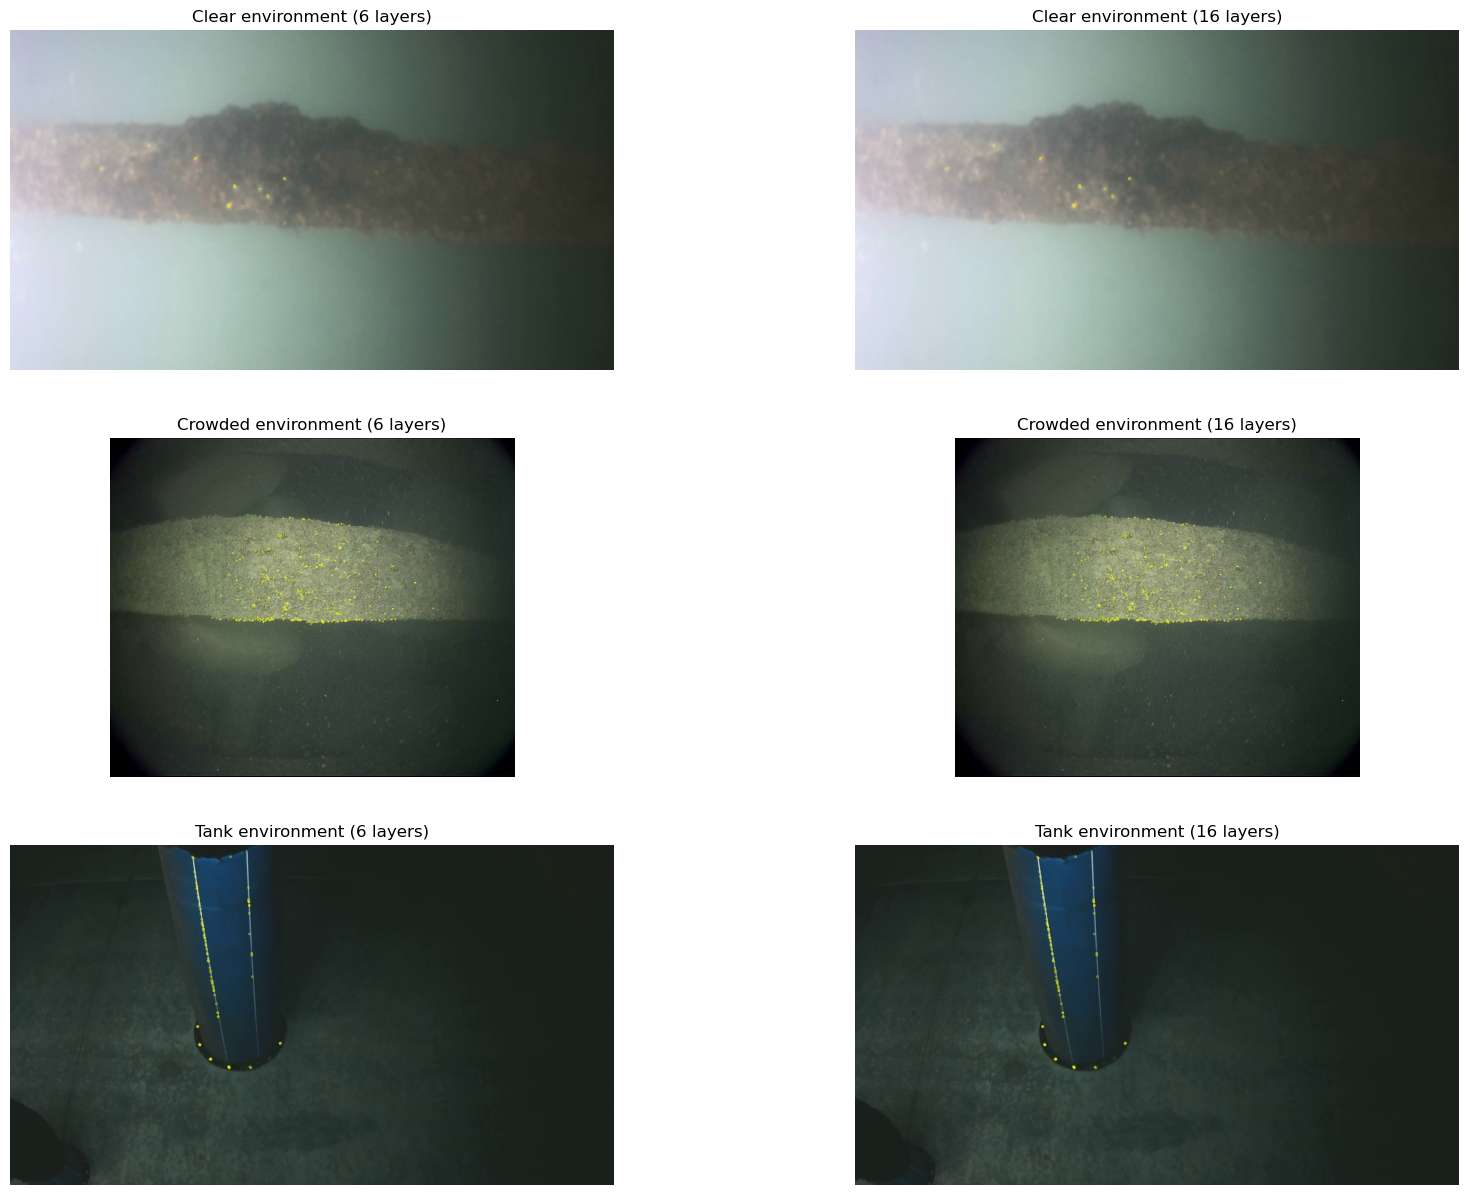

In [29]:
import cv2 
from matplotlib import pyplot as plt 

# figure 
image_figure = plt.figure(figsize=(20, 15))
rows = 3
columns = 2

# get images
clear_low = cv2.imread('../Data/Orb/Images/layers_low_frame_normal_clear_5.jpg',cv2.IMREAD_UNCHANGED)
clear_low = cv2.cvtColor(clear_low, cv2.COLOR_BGR2RGB)
clear_high = cv2.imread('../Data/Orb/Images/layers_high_frame_normal_clear_5.jpg',cv2.IMREAD_UNCHANGED) 
clear_high = cv2.cvtColor(clear_high, cv2.COLOR_BGR2RGB)

crowded_low = cv2.imread('../Data/Orb/Images/layers_low_frame_normal_crowded_23.jpg',cv2.IMREAD_UNCHANGED)
crowded_low = cv2.cvtColor(crowded_low, cv2.COLOR_BGR2RGB)
crowded_high = cv2.imread('../Data/Orb/Images/layers_high_frame_normal_crowded_23.jpg',cv2.IMREAD_UNCHANGED)
crowded_high = cv2.cvtColor(crowded_high, cv2.COLOR_BGR2RGB)

tank_low = cv2.imread('../Data/Orb/Images/layers_low_frame_normal_tank_14.jpg',cv2.IMREAD_UNCHANGED)
tank_low = cv2.cvtColor(tank_low, cv2.COLOR_BGR2RGB)
tank_high = cv2.imread('../Data/Orb/Images/layers_high_frame_normal_tank_14.jpg',cv2.IMREAD_UNCHANGED)
tank_high = cv2.cvtColor(tank_high, cv2.COLOR_BGR2RGB)

# add images to figure
image_figure.add_subplot(rows, columns, 1)
plt.imshow(clear_low) 
plt.axis('off') 
plt.title("Clear environment (6 layers)") 

image_figure.add_subplot(rows, columns, 2)
plt.imshow(clear_high) 
plt.axis('off') 
plt.title("Clear environment (16 layers)")

image_figure.add_subplot(rows, columns, 3)
plt.imshow(crowded_low) 
plt.axis('off') 
plt.title("Crowded environment (6 layers)") 

image_figure.add_subplot(rows, columns, 4)
plt.imshow(crowded_high) 
plt.axis('off') 
plt.title("Crowded environment (16 layers)")

image_figure.add_subplot(rows, columns, 5)
plt.imshow(tank_low) 
plt.axis('off') 
plt.title("Tank environment (6 layers)")

image_figure.add_subplot(rows, columns, 6)
plt.imshow(tank_high) 
plt.axis('off') 
plt.title("Tank environment (16 layers)") 

No inherent difference, between the number of layers is seen. For fututure implementations 6 layers will therefore be used.

### Edge threshold:

The edge threshold is basically the size of the border where nothing will be seen as features. This might help remove outliers, but will also result in us loosing the objects of interest faster.

The remaining variable where kept constant at the following values: <br>
Scale factor: 1.6<br>
Layers: 6<br>
Start level: 0<br>
Points in element: 2<br>
Patch size: 31<br>
Fast threshold: 20<br>

### Start level:

### Points in element:

### Patch size:

### Fast threshold: